## 1. Load data from database

In [10]:
import pandas as pd
import sqlite3

path = "/Users/pavel/PycharmProjects/stock-market-app/src/financial_data.db"

sqlFinancials  = """select *
from balance_sheet bs
left join pnl p
on bs.ticker = p.ticker
and bs.type = p.type
and bs.fiscalDateEnding = p.fiscalDateEnding
left join cash_flow cf
on bs.ticker = cf.ticker
and bs.type = cf.type
and bs.fiscalDateEnding = cf.fiscalDateEnding
"""
conn = sqlite3.connect(path)
financials_db = pd.read_sql(sqlFinancials, conn)
conn.close()

financials_db = financials_db.loc[:, ~financials_db.columns.duplicated()]

sqlCandles = "select * from candles"
conn = sqlite3.connect(path)
candles_db = pd.read_sql(sqlCandles, conn)
conn.close()

# Counting forward looking 90-days average
candles = candles_db[['date_time','ticker', 'close']].copy()
candles = candles.sort_values(['ticker', 'date_time'])
candles['avg_90d'] = (
    candles.groupby('ticker')['close']
    .apply(lambda x: x.shift(-90).rolling(90).mean())
    .reset_index(level=0, drop=True)
)


# Merge financials and stock prices data
candles['date_time'] = pd.to_datetime(candles['date_time'])

financials_db['fiscalDateEnding'] = pd.to_datetime(financials_db['fiscalDateEnding'])

candles = candles.sort_values(by='date_time')
financials_db = financials_db.sort_values(by='fiscalDateEnding')

financials = pd.merge_asof(
    financials_db,
    candles,
    left_on='fiscalDateEnding',
    right_on='date_time',
    by='ticker',
    direction='nearest'  # use nearest valus
)

## 2. Inputs for analysis

In [11]:
selected_tickers = financials['ticker'].unique()
financial_indicators = ['ebitda', 'totalRevenue', 'netIncome']
start_date = '2019-01-01'
end_date = '2024-12-31'

## 3. Preaparation dataset

In [12]:
# create dataset with necessary data
crude_data = financials[(financials['type'] == 'quarterly') & (financials['fiscalDateEnding'] >= start_date) &
                    (financials['fiscalDateEnding'] <= end_date)][['fiscalDateEnding', 'ticker', 'ebitda', 'totalRevenue', 'netIncome', 'avg_90d']]

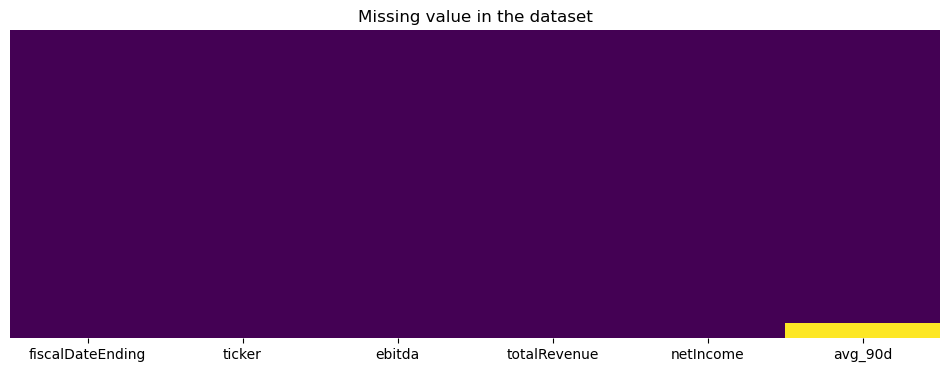

In [13]:
# check for missing values
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(12,4))
sns.heatmap(crude_data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [14]:
data = crude_data.dropna()

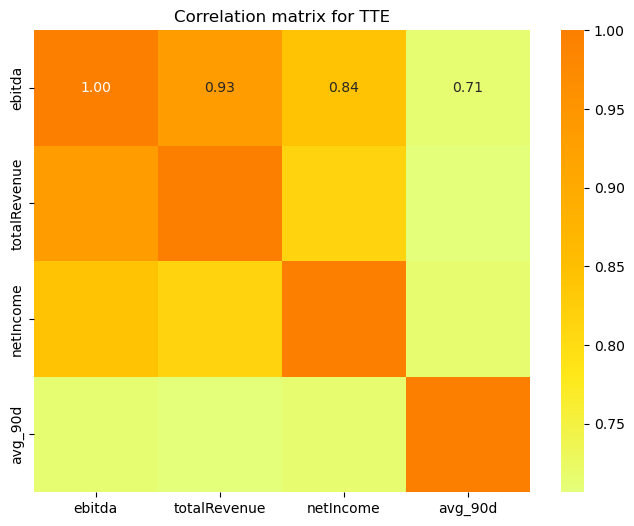

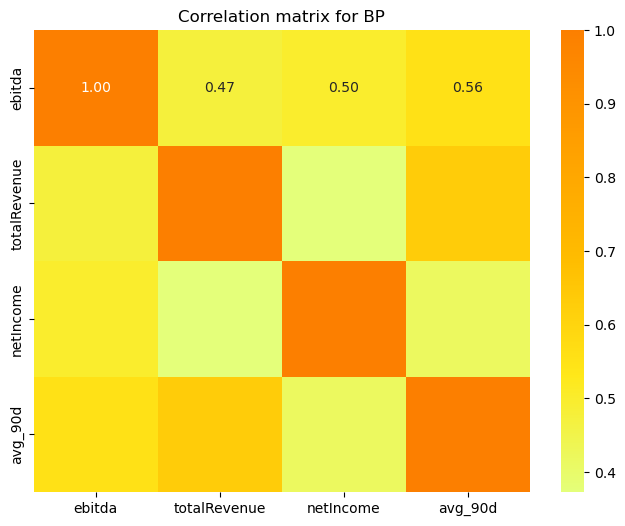

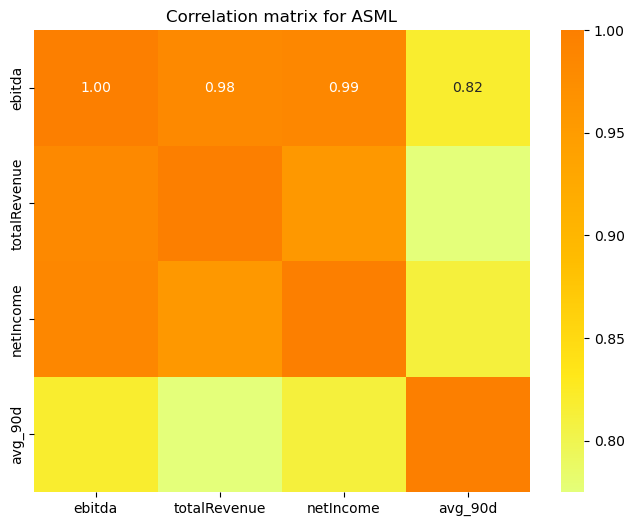

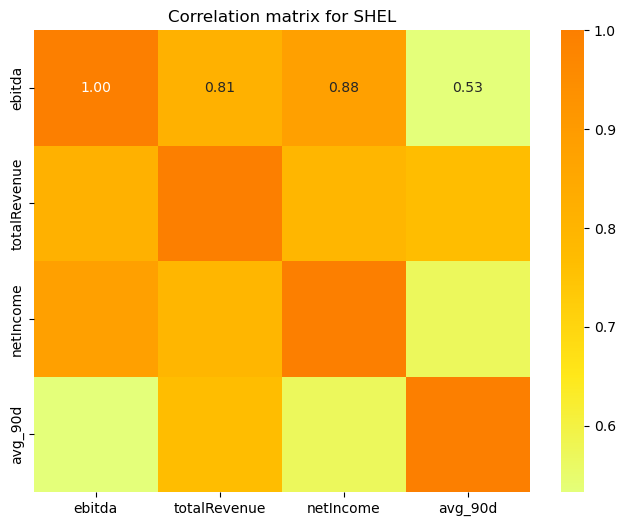

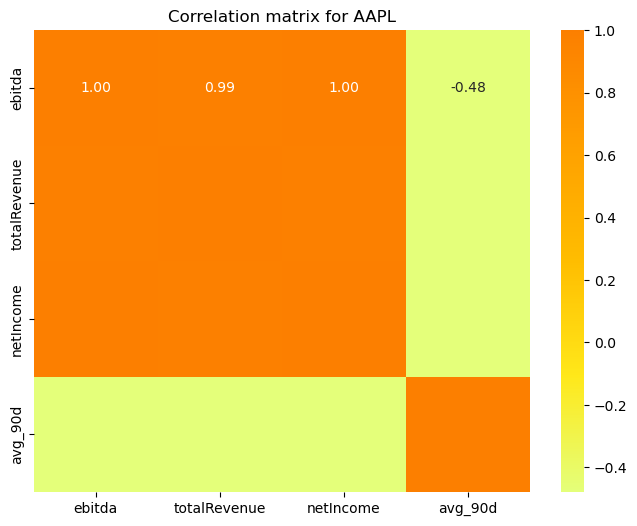

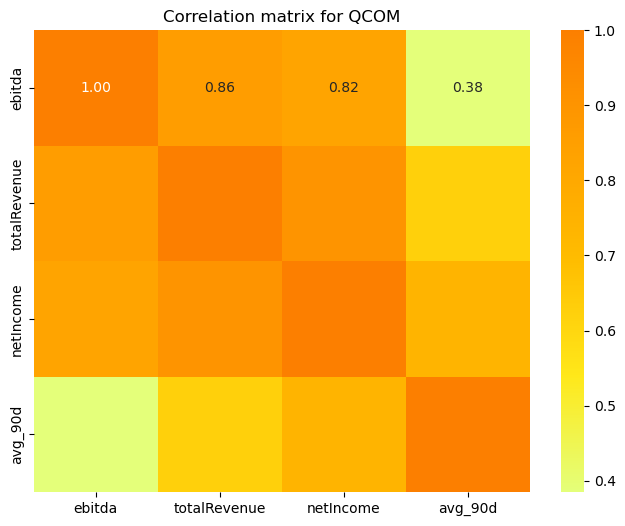

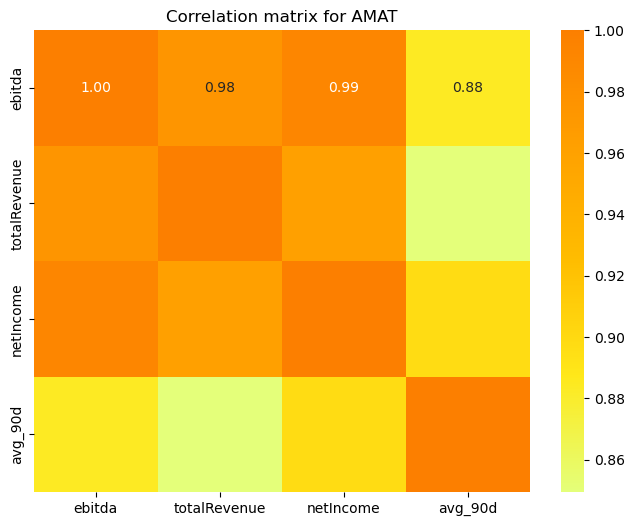

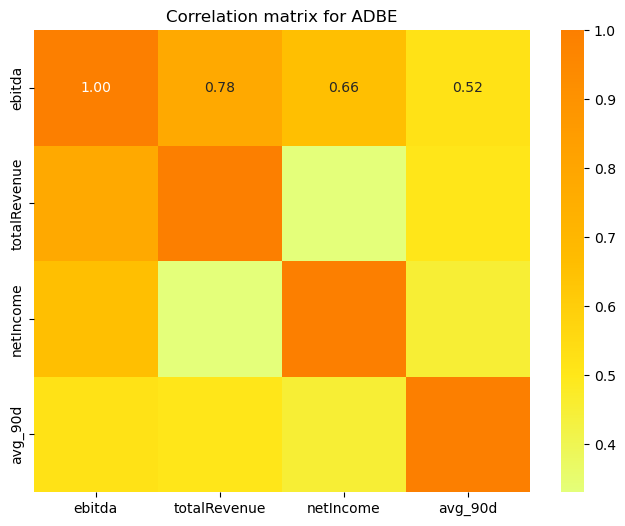

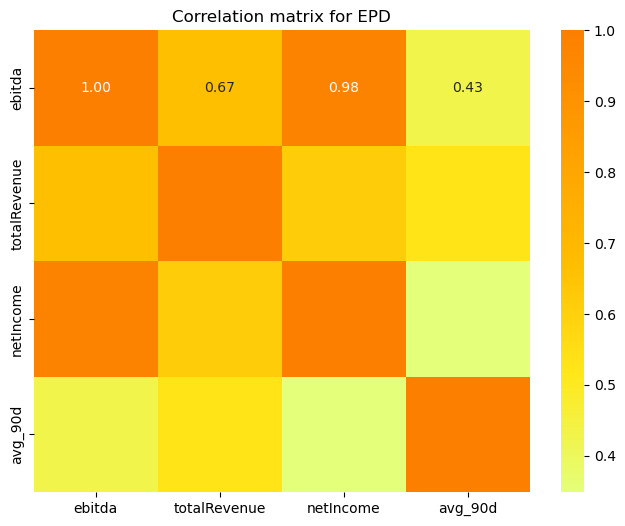

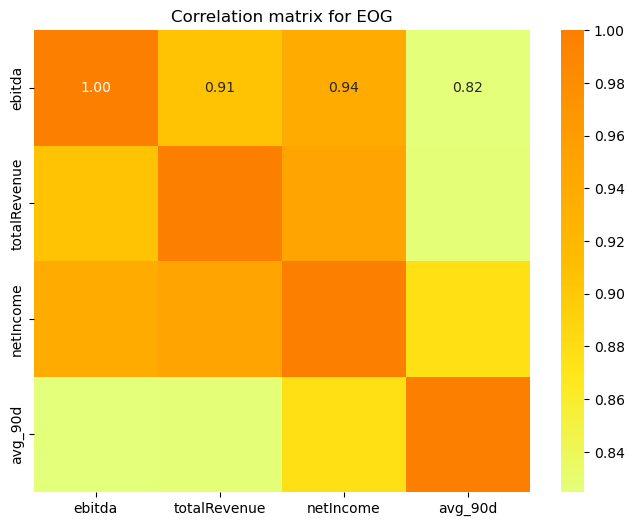

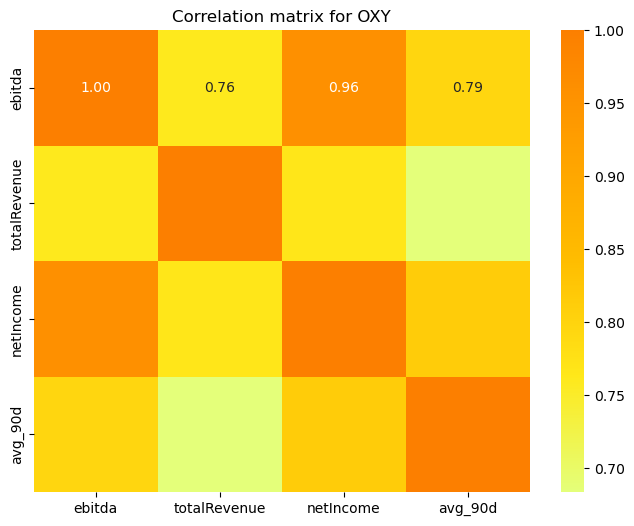

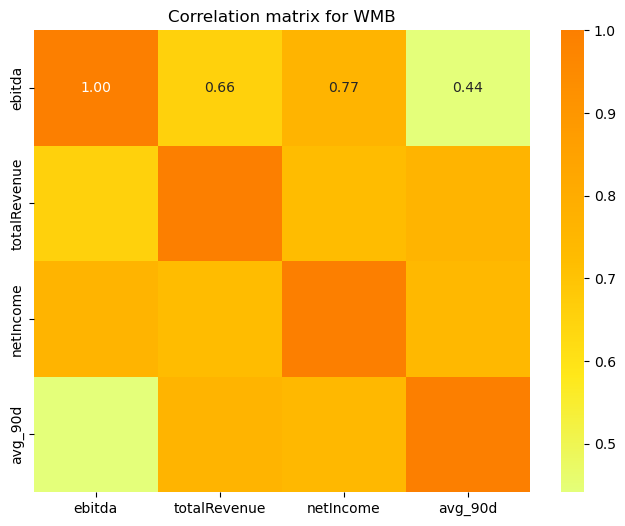

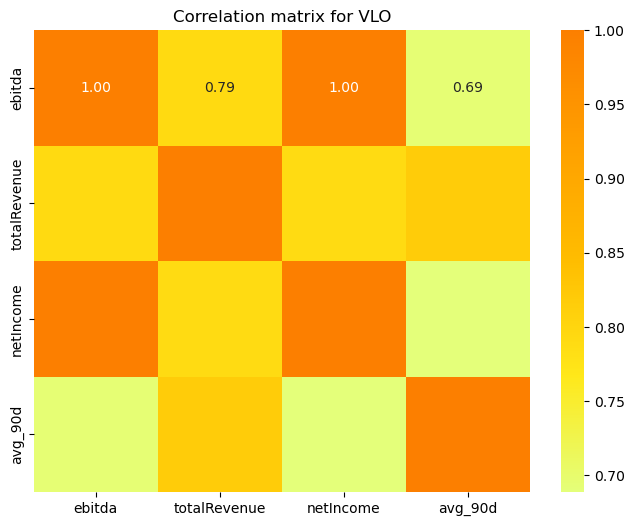

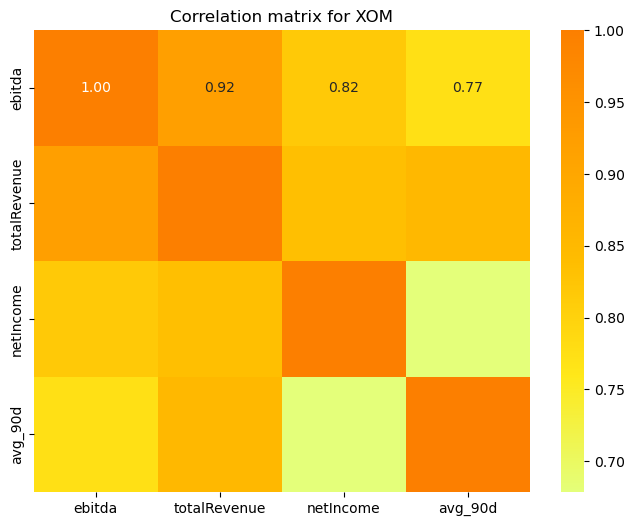

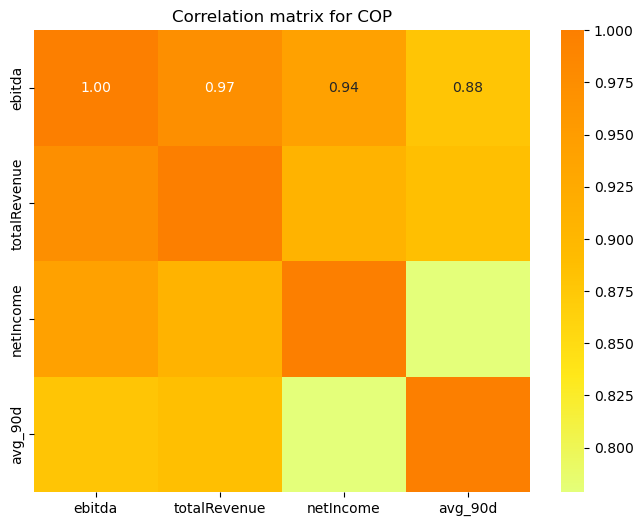

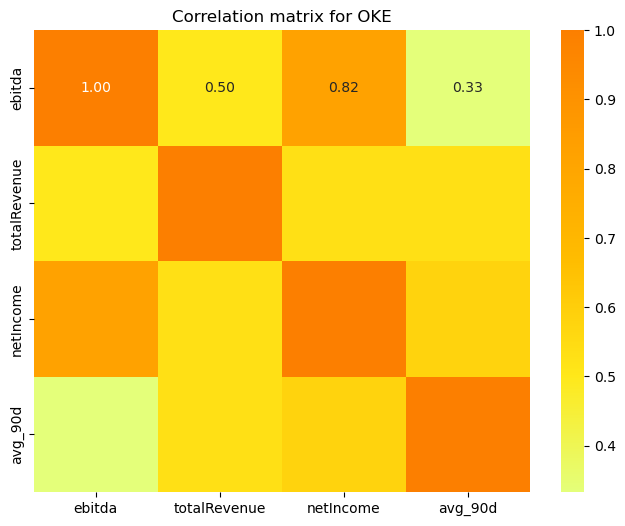

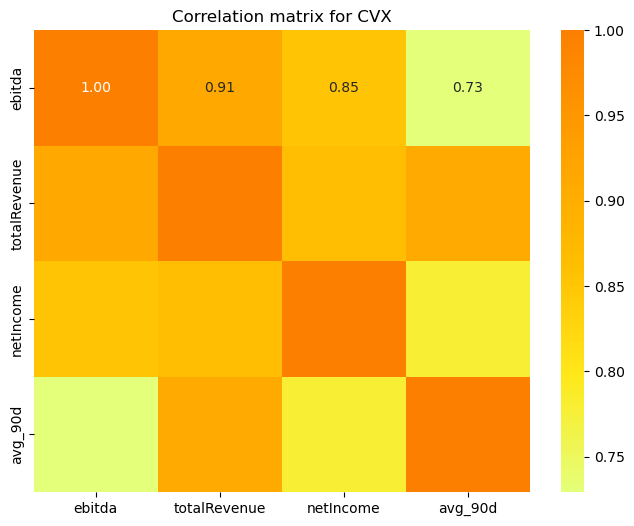

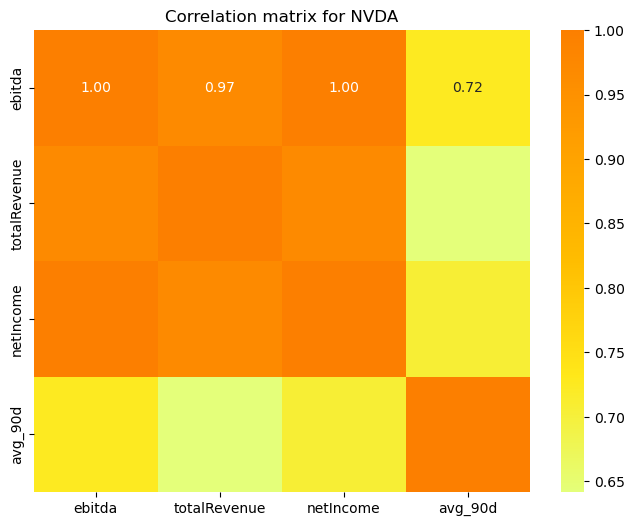

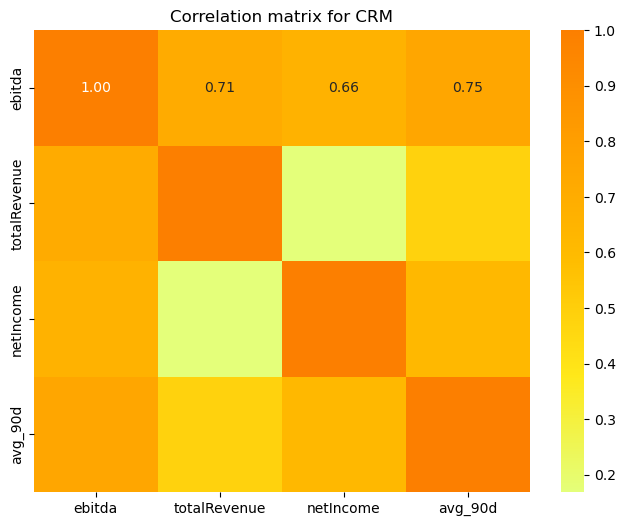

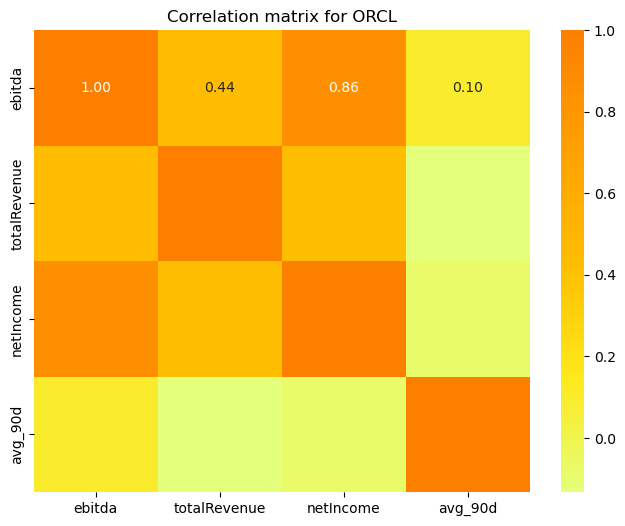

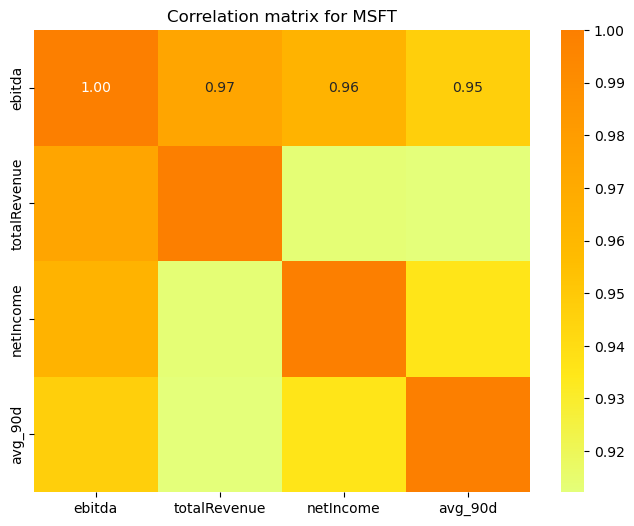

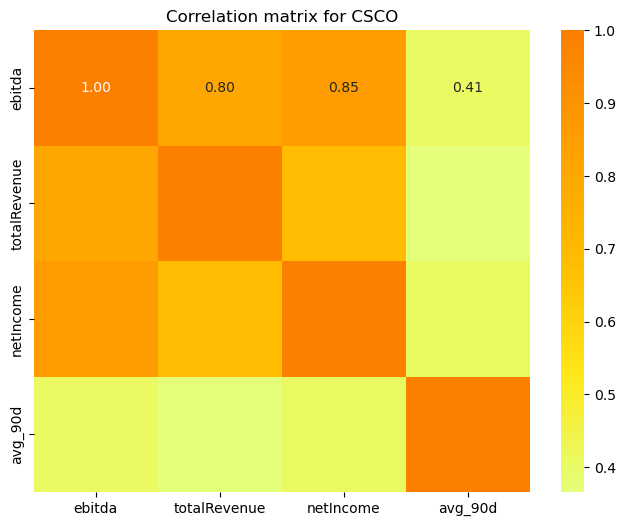

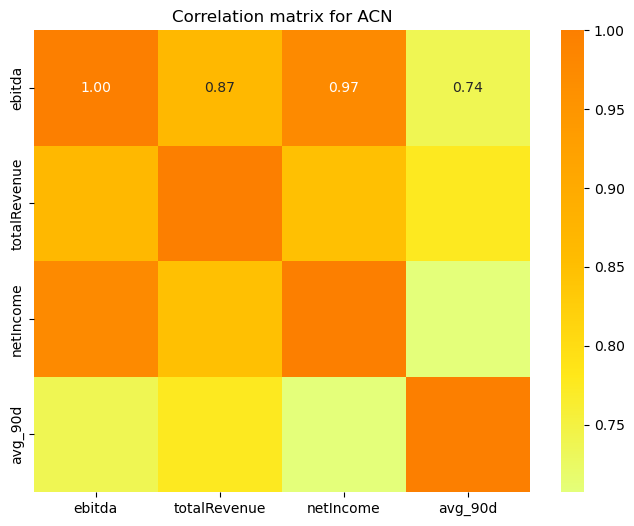

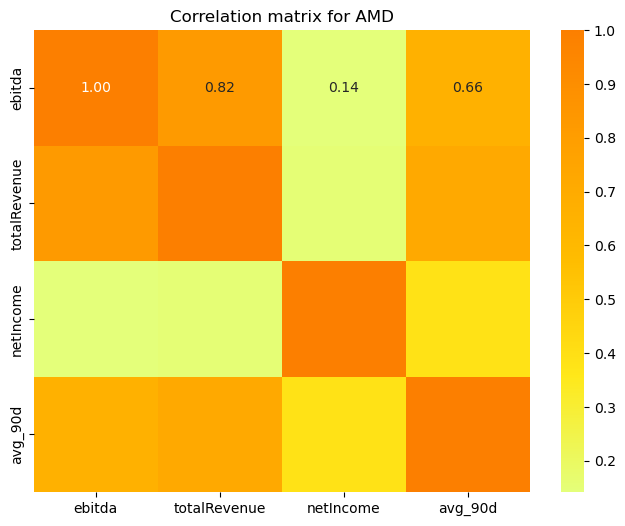

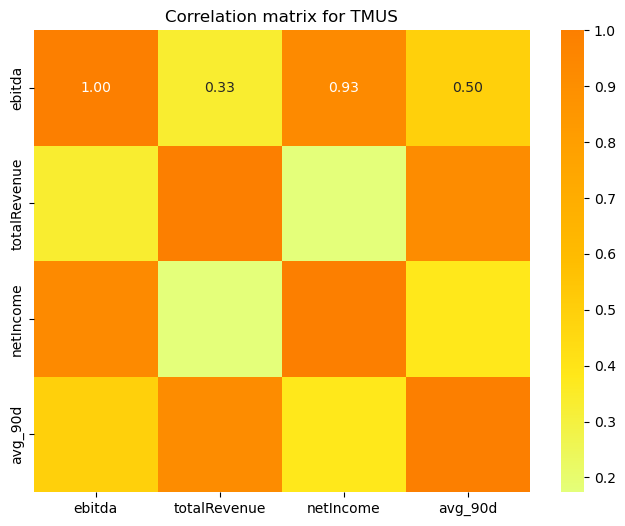

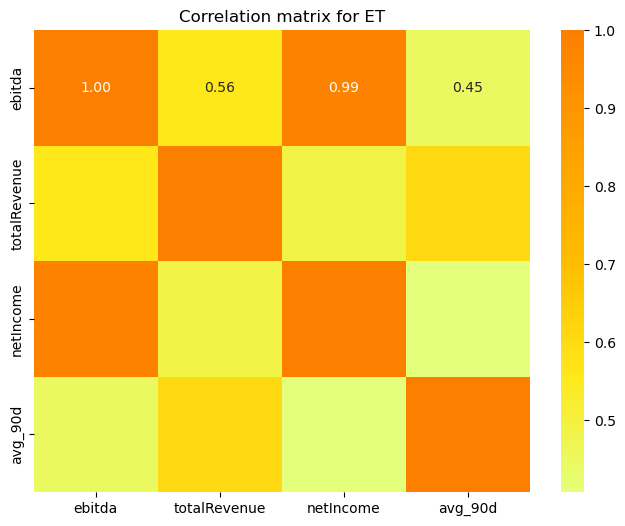

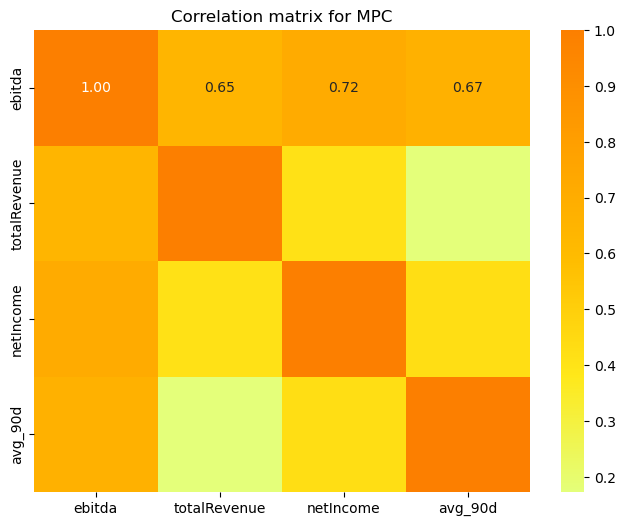

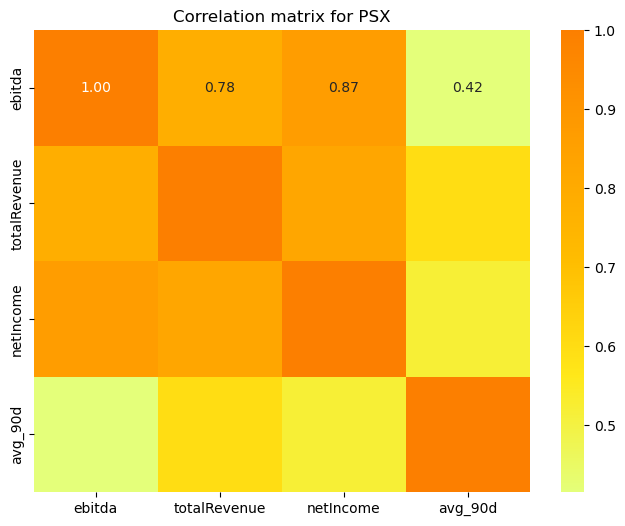

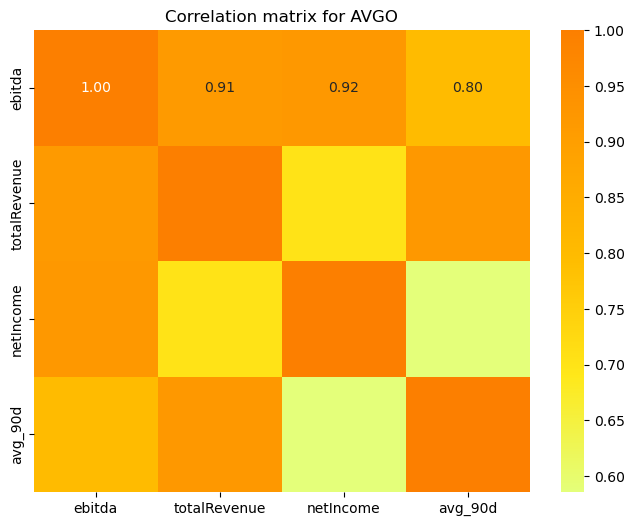

In [15]:
# correlation analysis
for ticker in selected_tickers:
    corr = data[(data['ticker'] == ticker)][['ebitda', 'totalRevenue', 'netIncome', 'avg_90d']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, cmap='Wistia', annot=True, fmt=".2f", cbar=True)
    plt.title(f'Correlation matrix for {ticker}')
    plt.show()

/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[financial],bins=50,color='r',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/j7/bpk2y95s0x12x19c3r

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data[financial]),bins=40,color='b',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j7/bpk2y95

/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[financial],bins=50,color='r',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/j7/bpk2y95s0x12x19c3r

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[financial],bins=50,color='r',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[financial],bins=50,color='r',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data[financial]),bins=40,color='b',ax=ax)
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data[financial]),bins=40,color='b',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[financial],bins=50,color='r',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[financial],bins=50,color='r',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[financial],bins=50,color='r',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data[financial]),bins=40,color='b',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to u

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data[financial]),bins=40,color='b',ax=ax)
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[financial],bins=50,color='r',ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_36221/3551033164.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data[financial]),bins=40,color='b',ax=ax)
/opt/anaconda3/lib/pyth

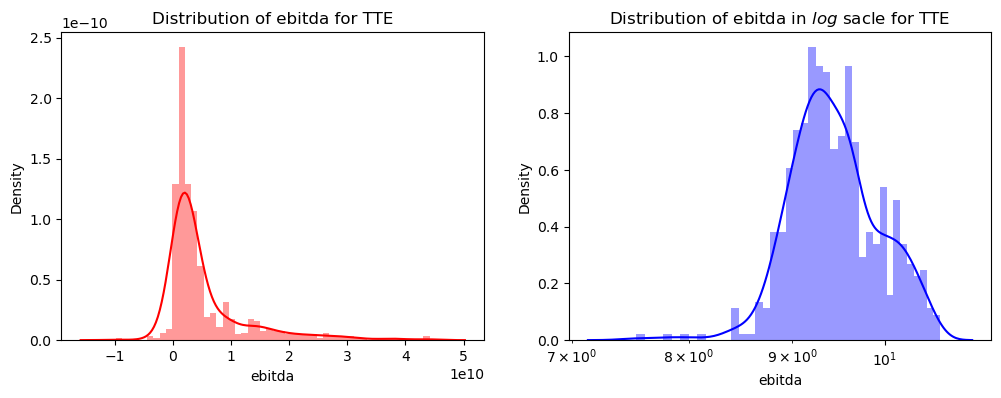

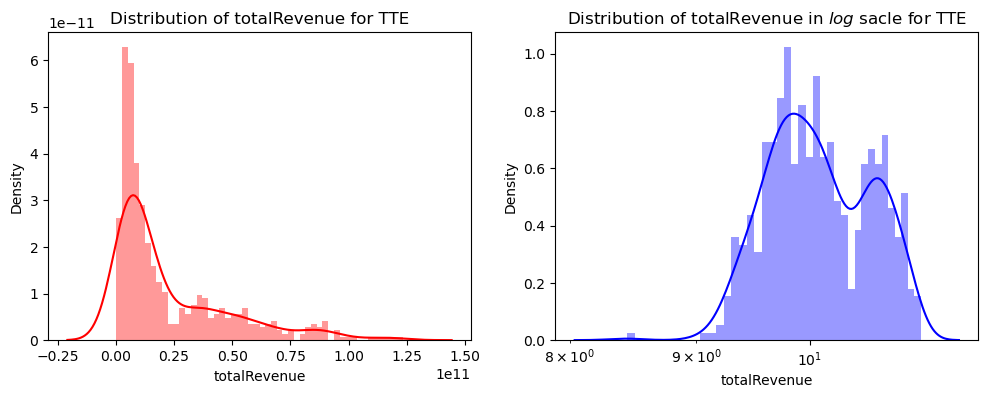

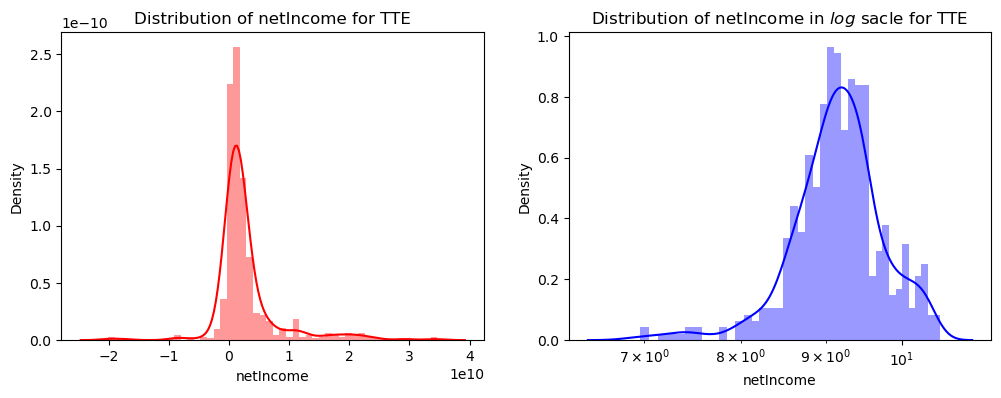

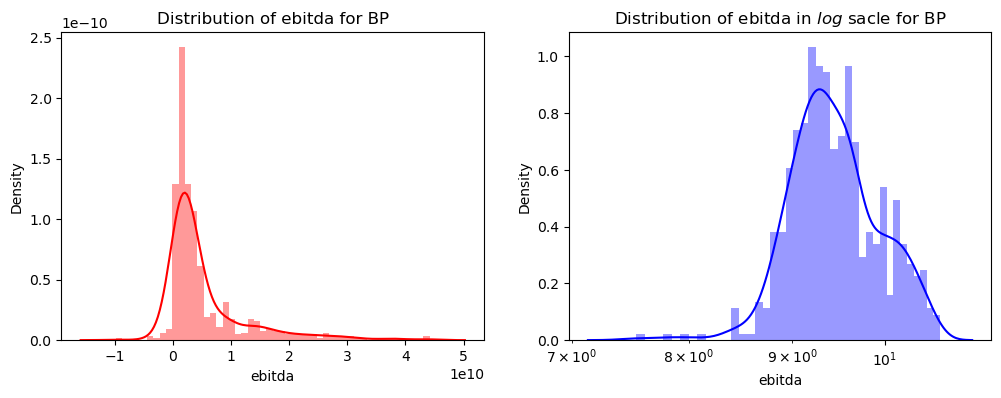

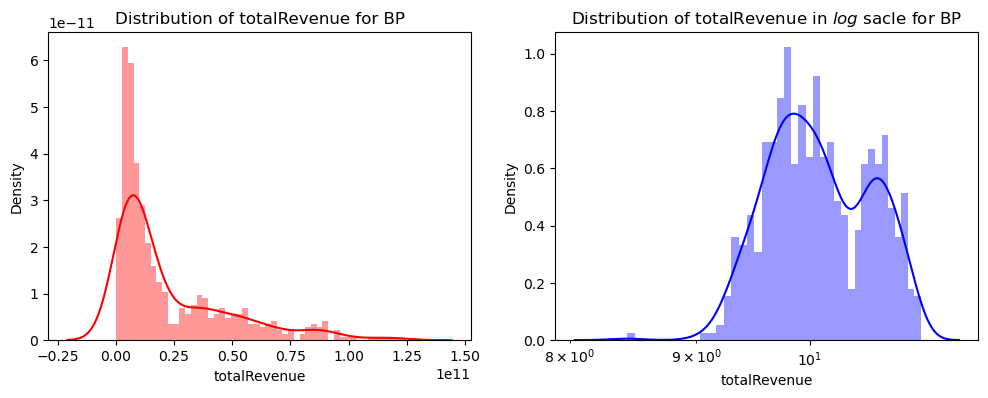

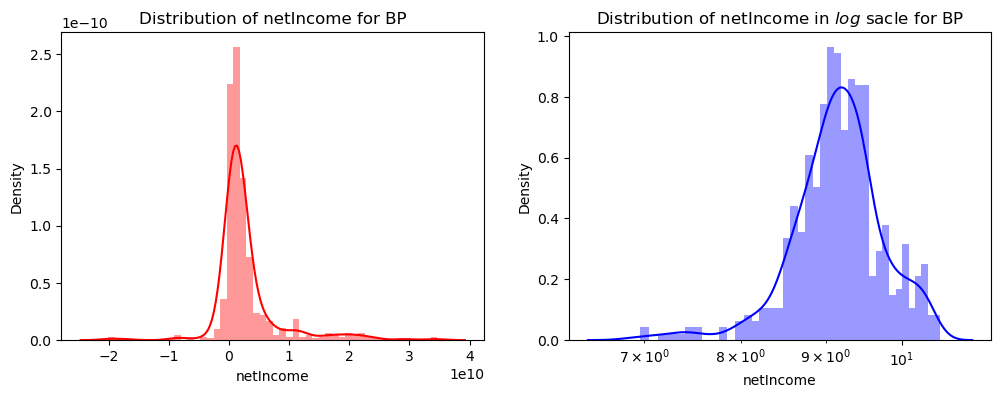

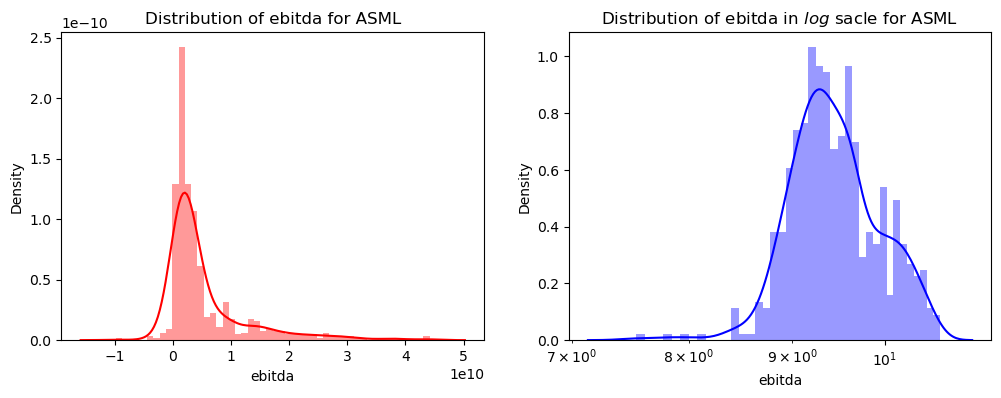

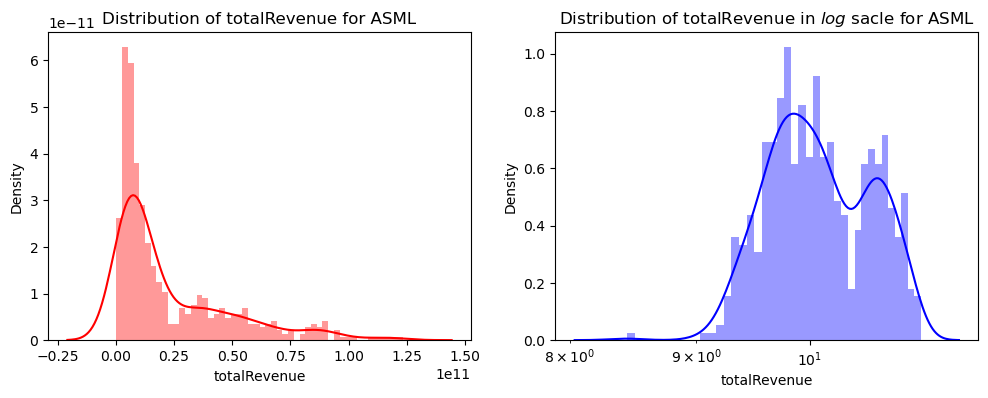

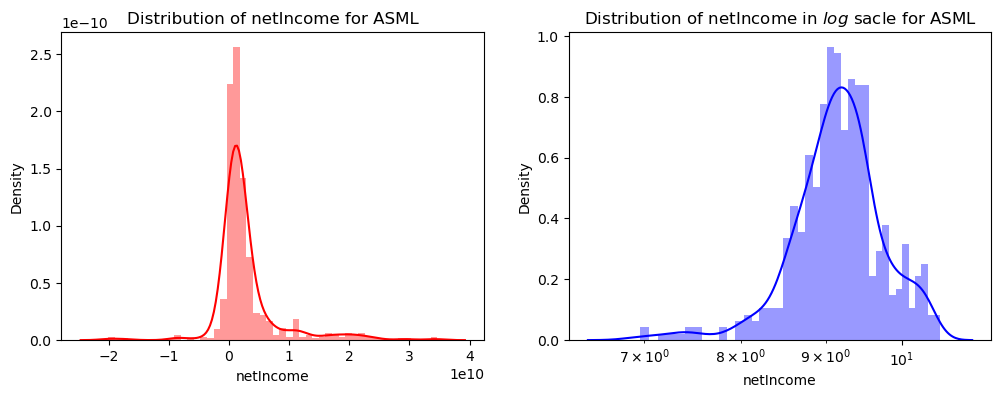

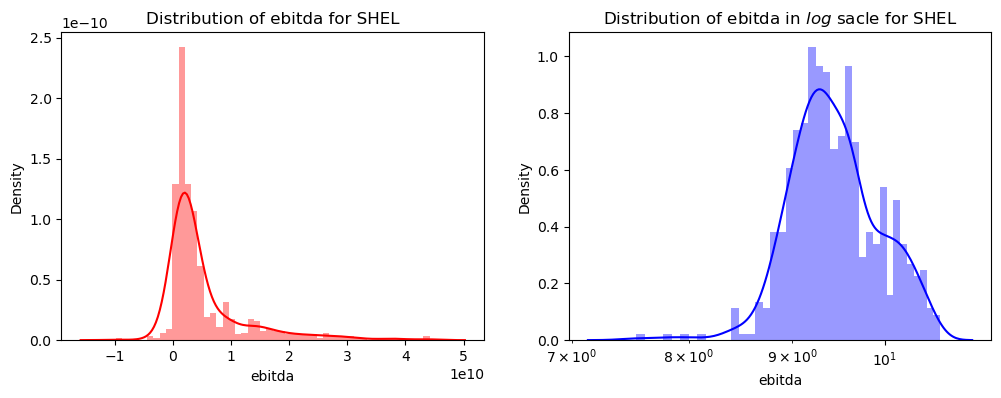

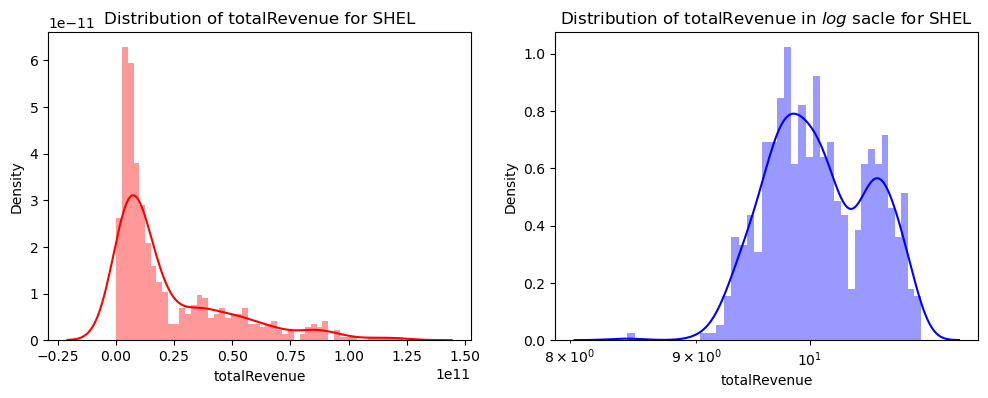

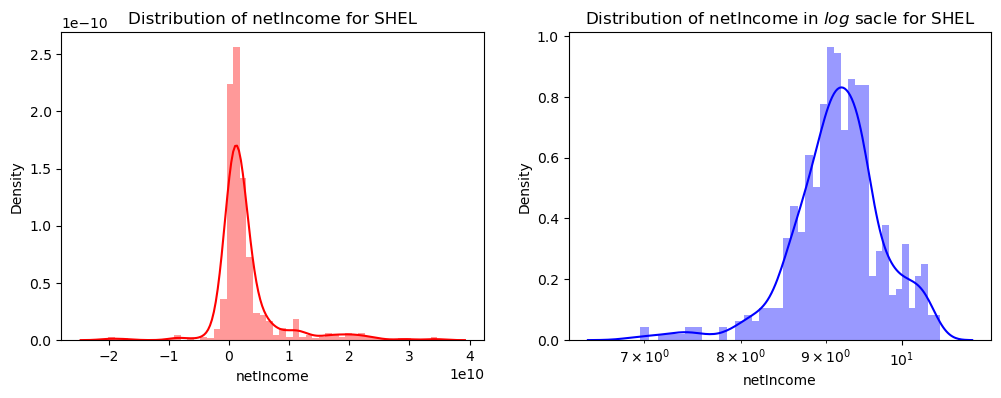

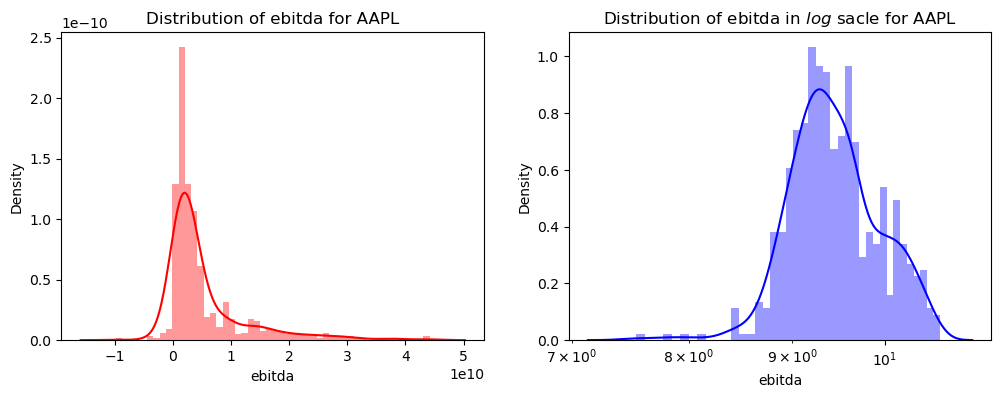

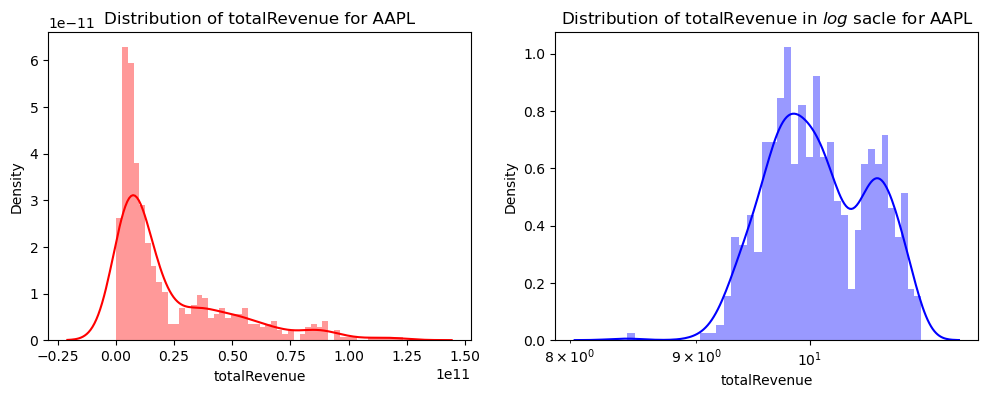

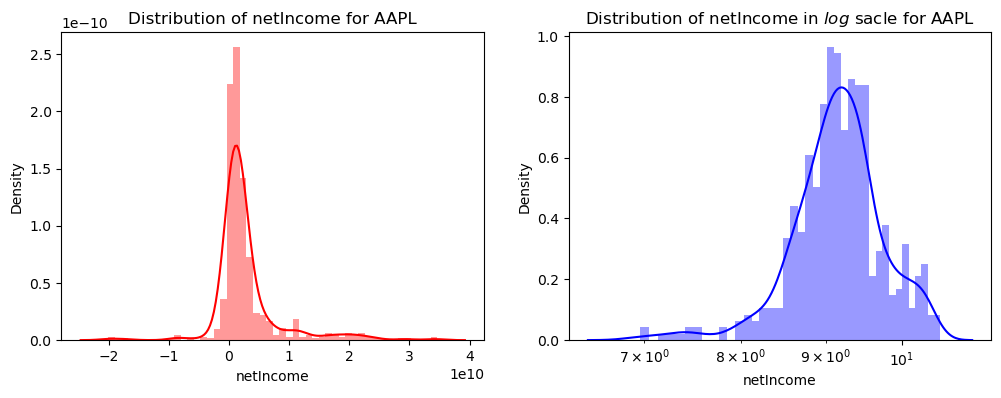

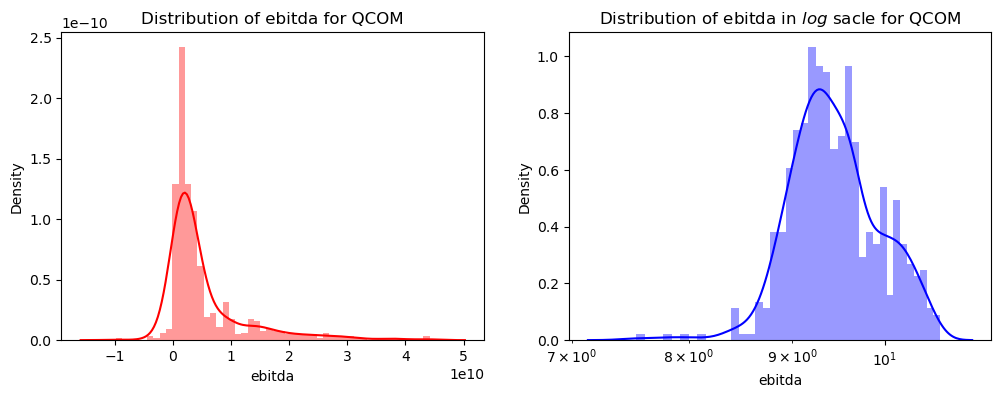

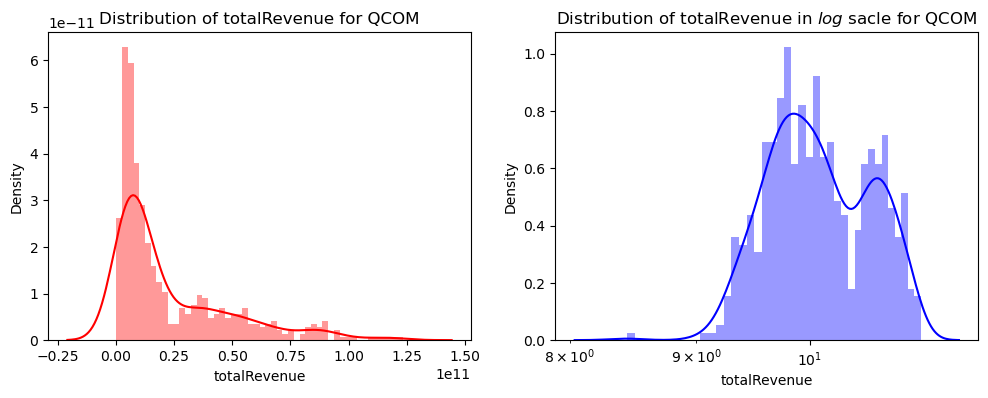

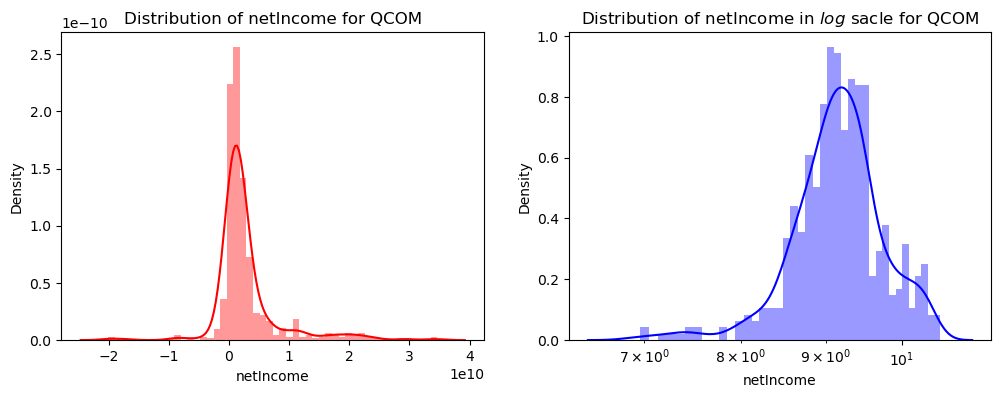

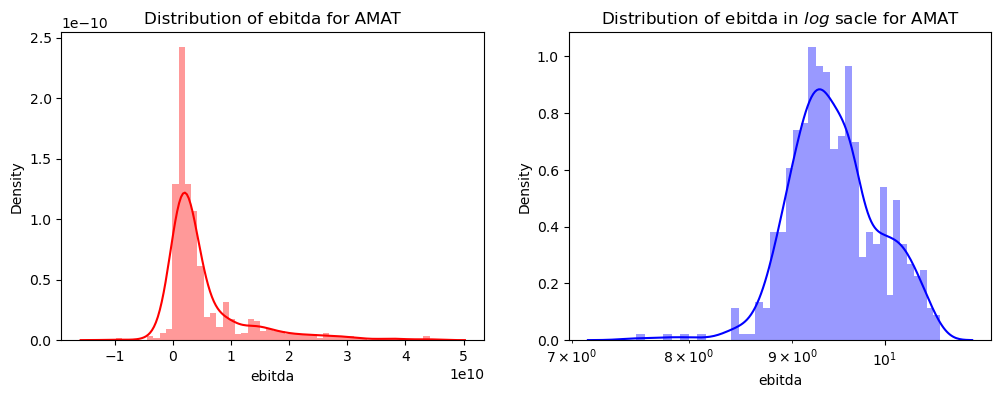

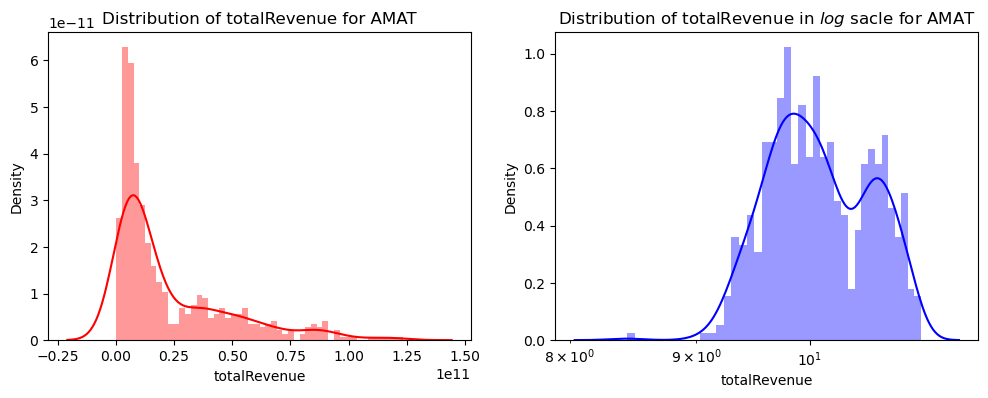

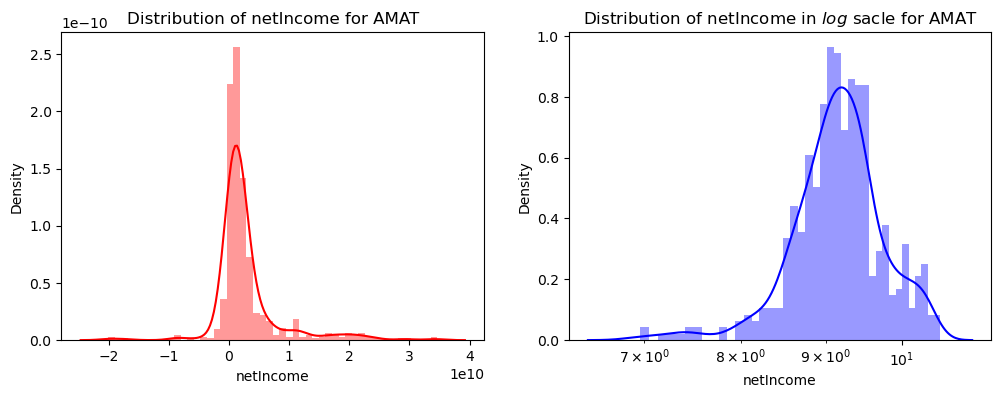

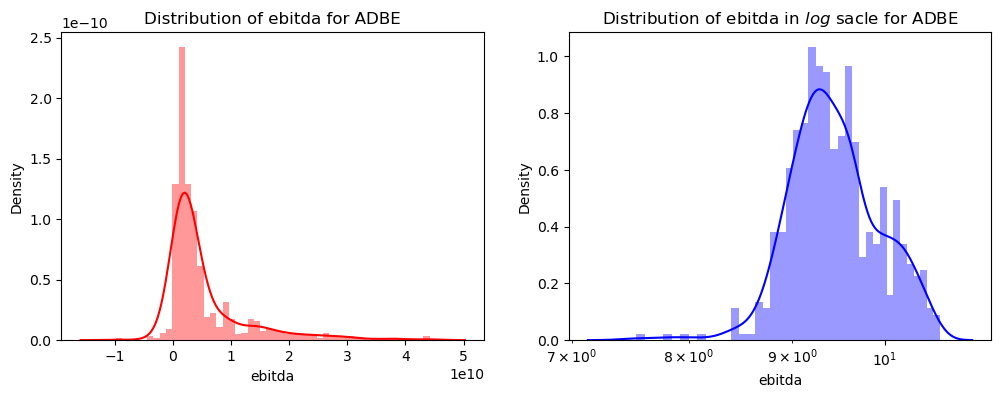

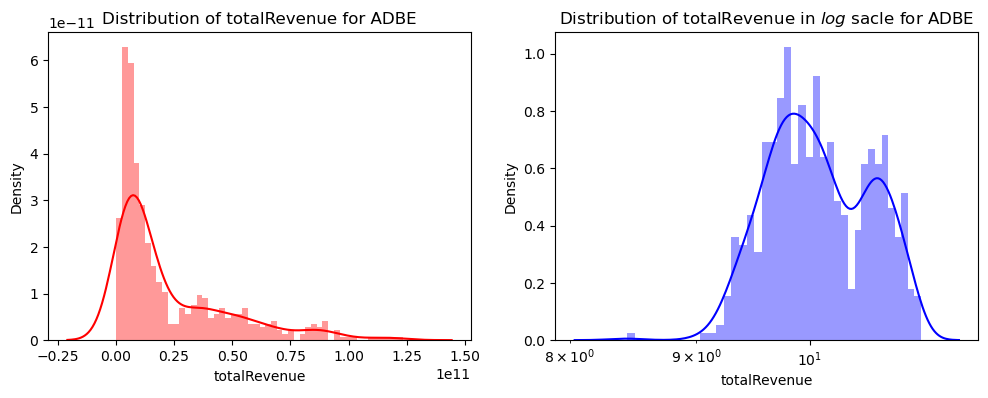

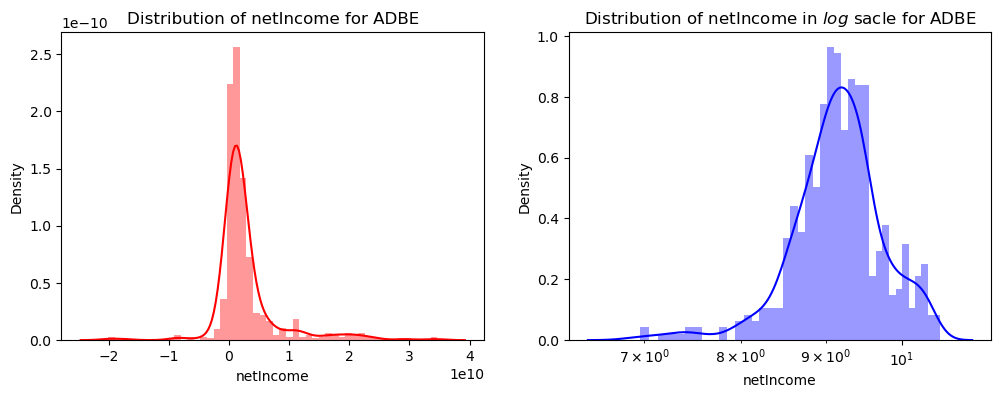

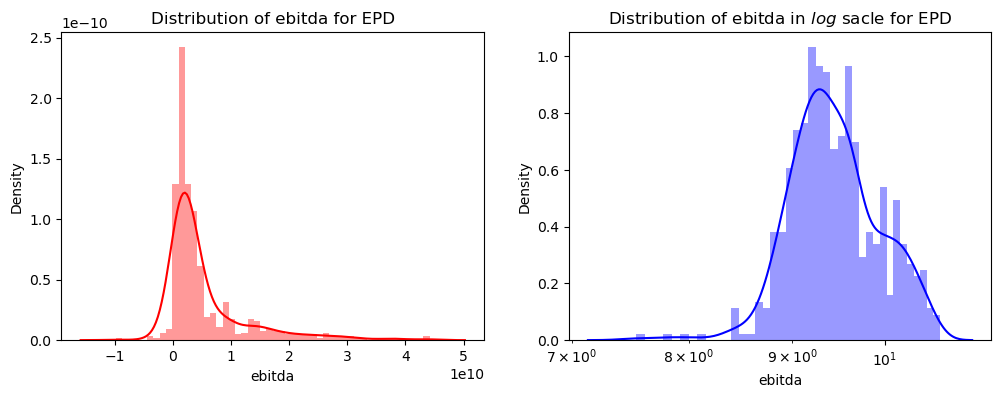

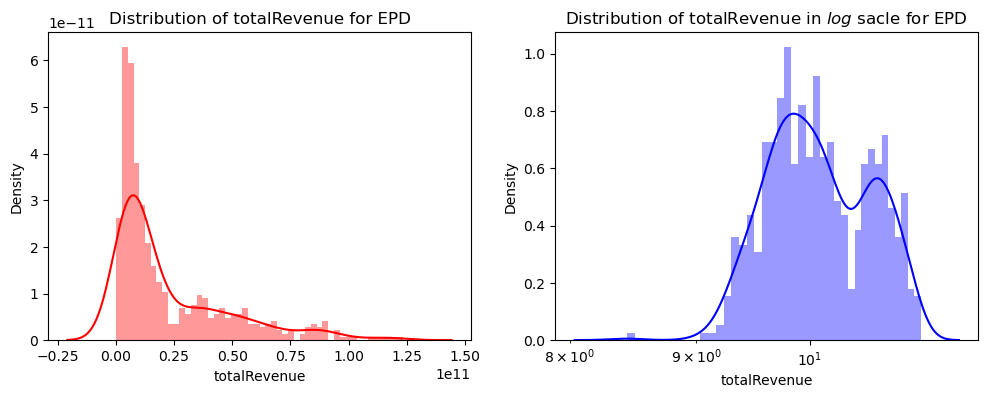

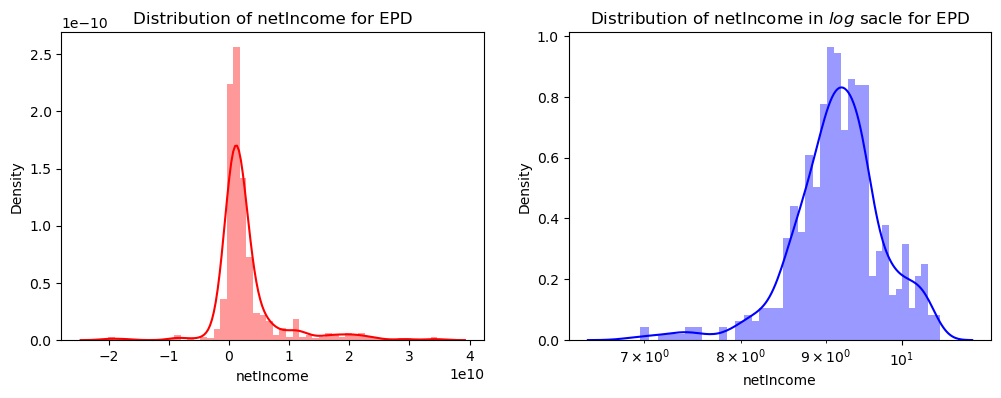

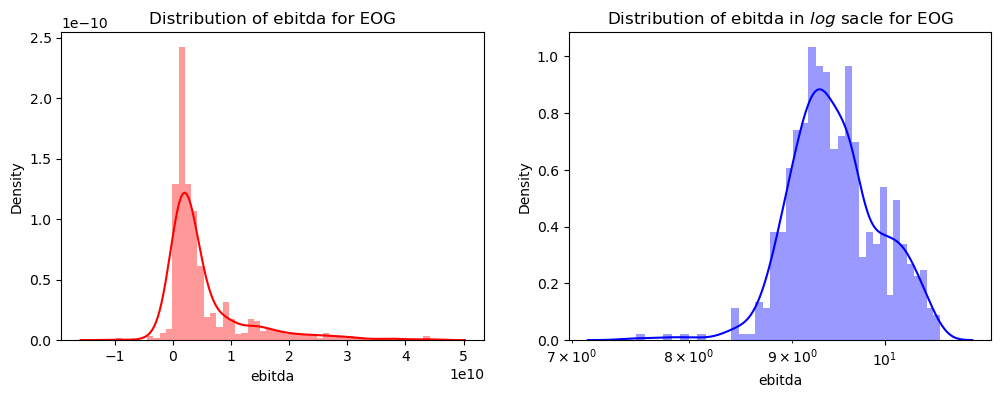

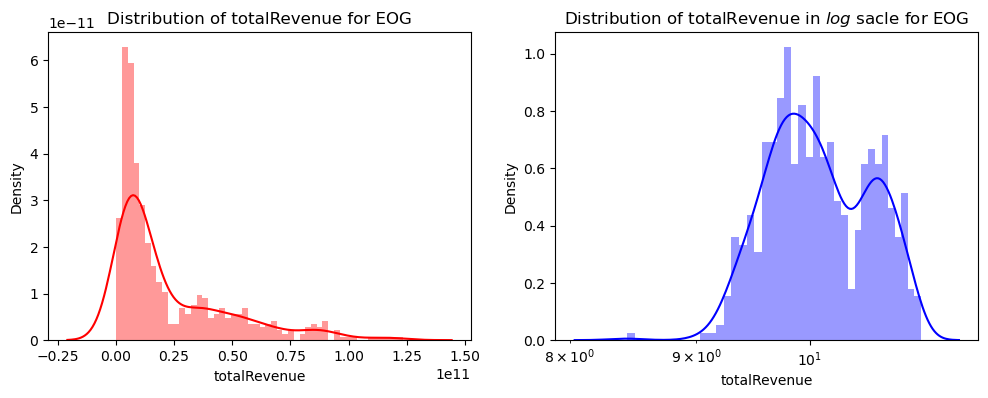

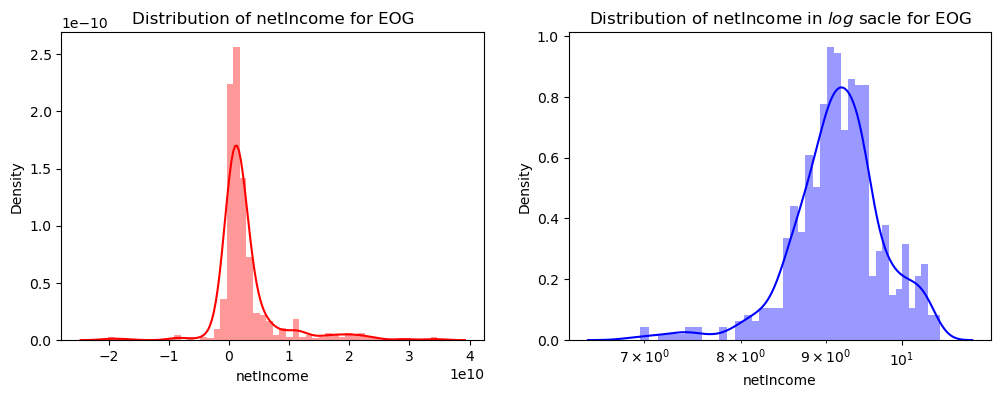

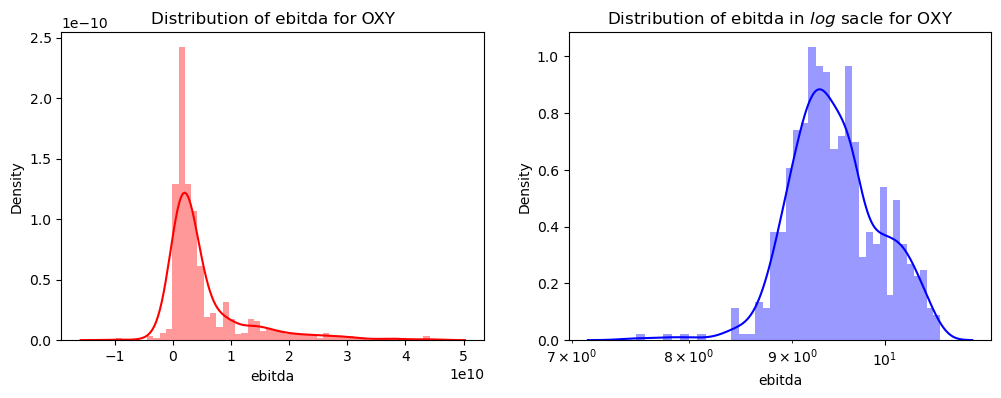

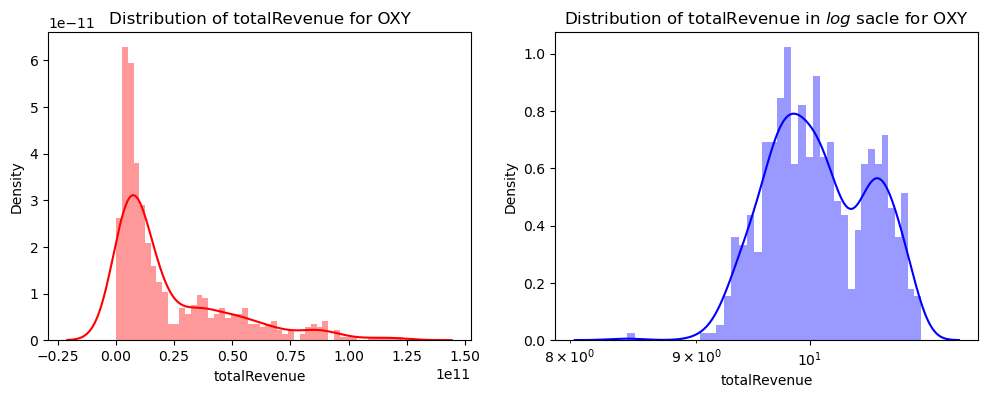

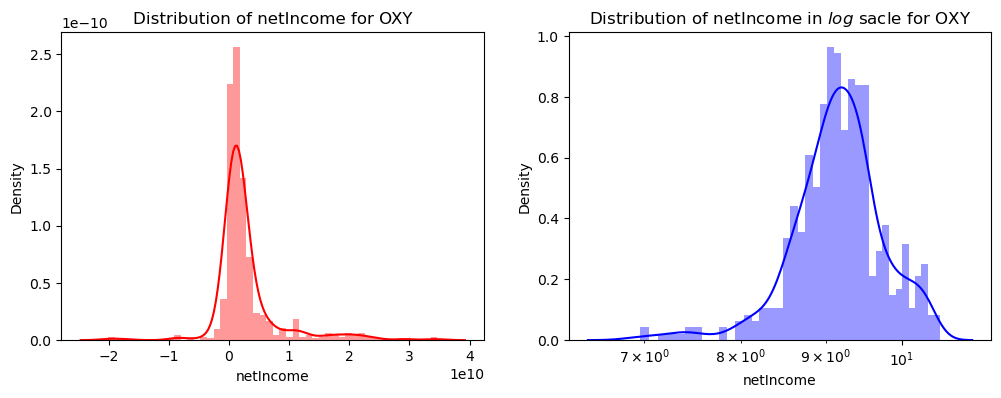

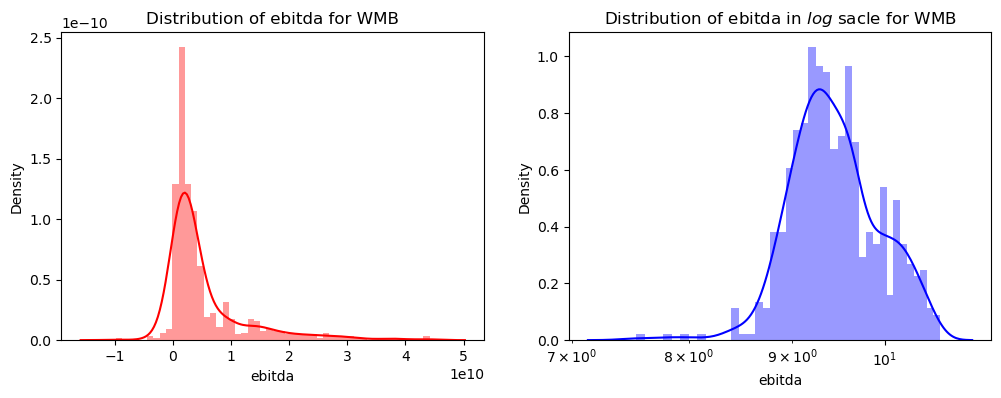

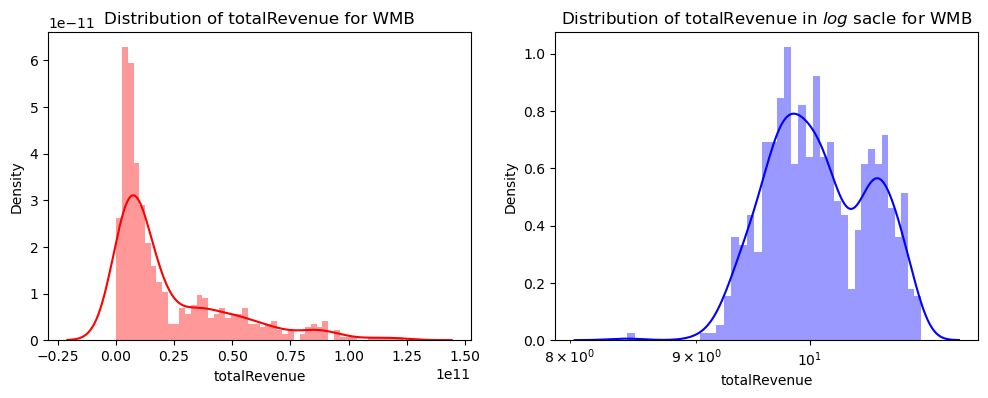

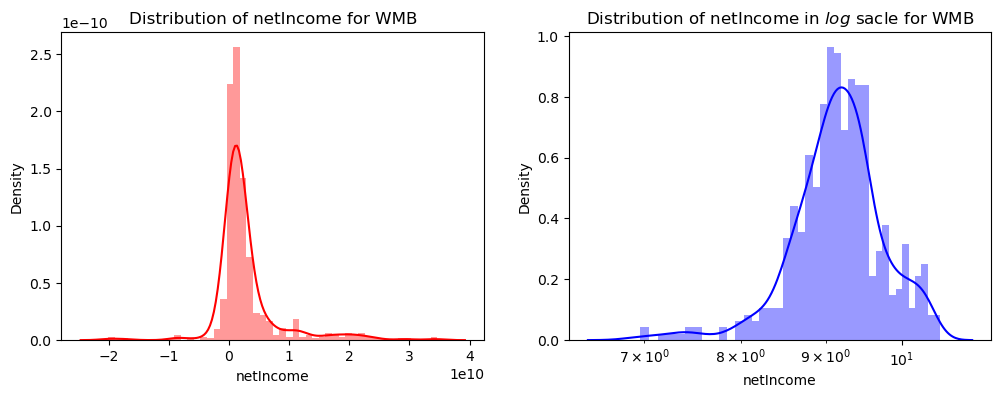

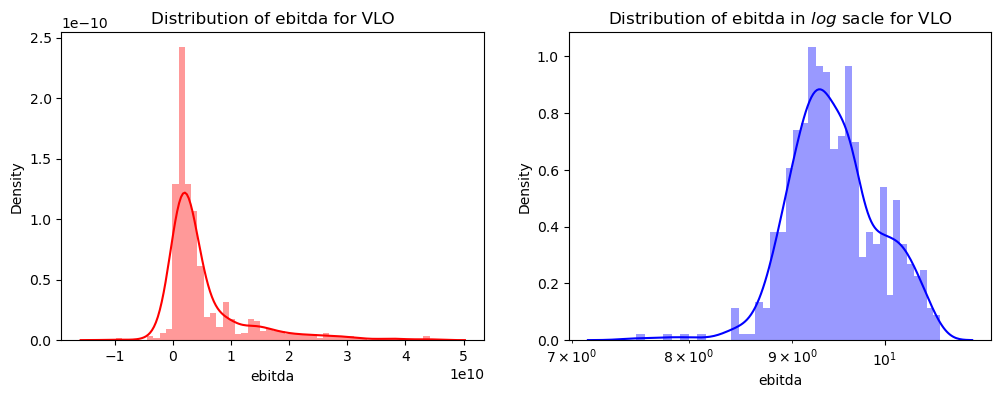

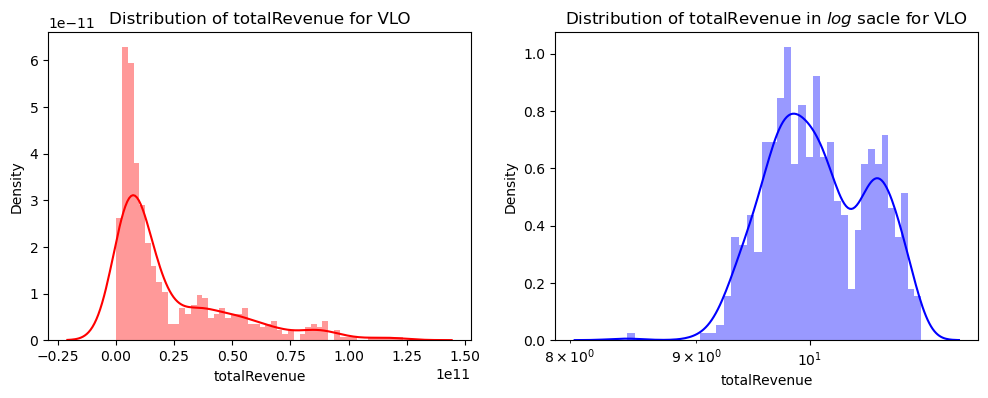

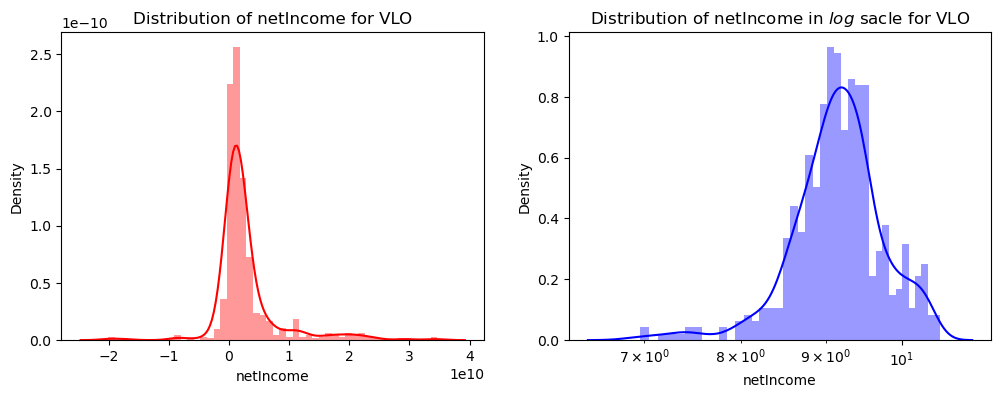

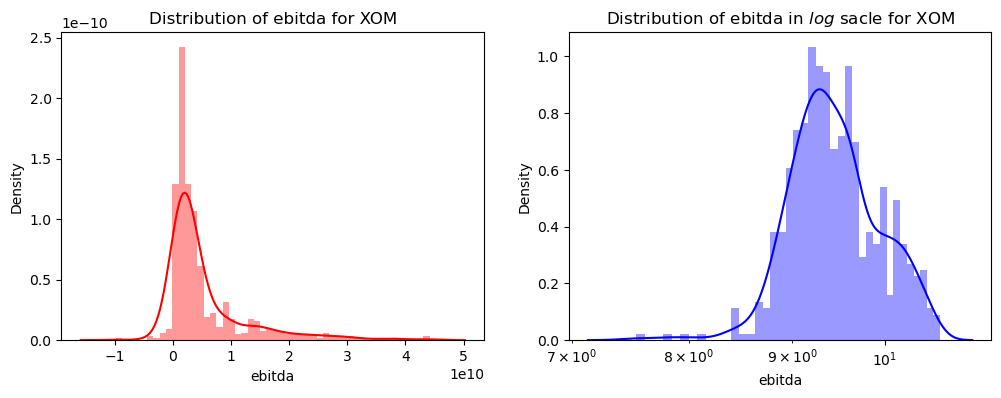

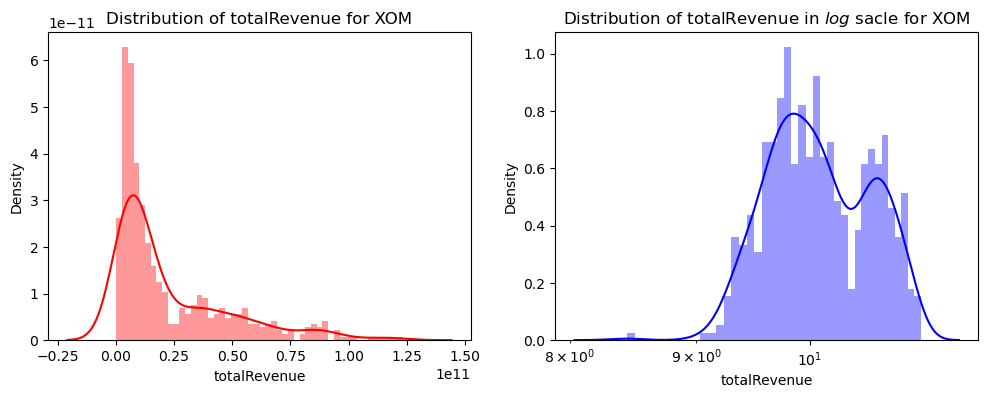

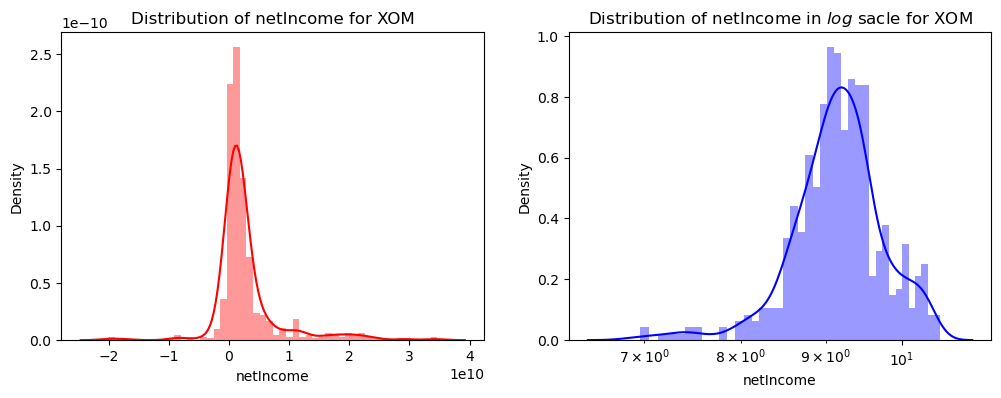

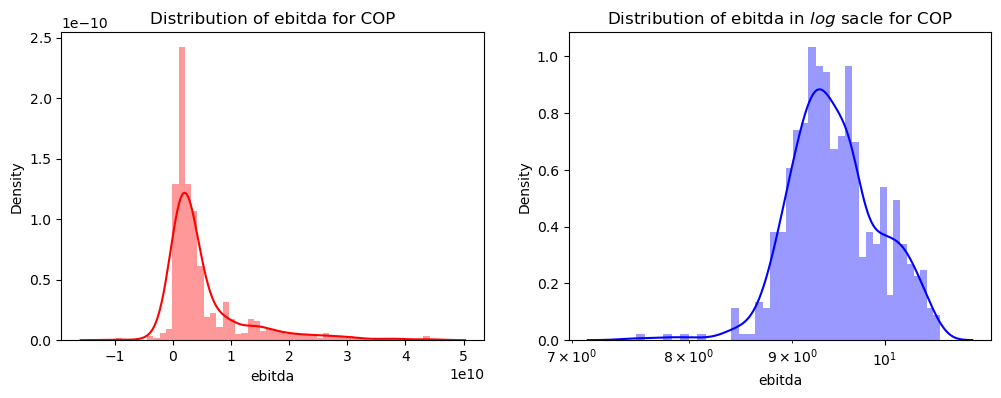

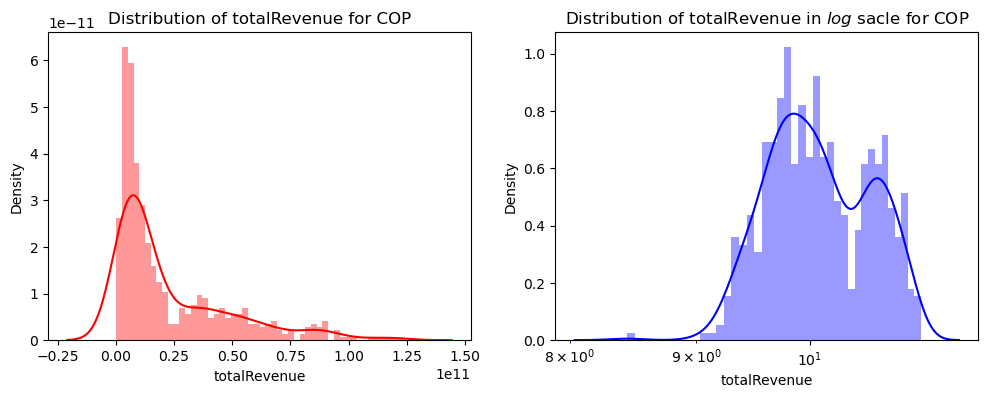

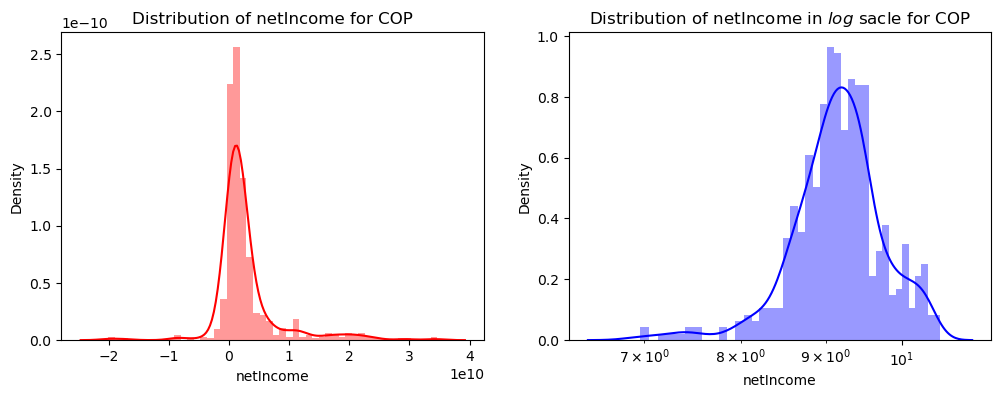

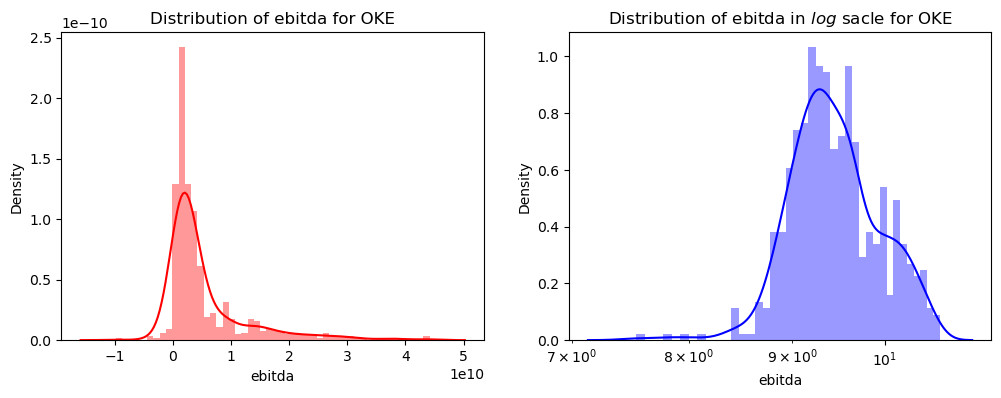

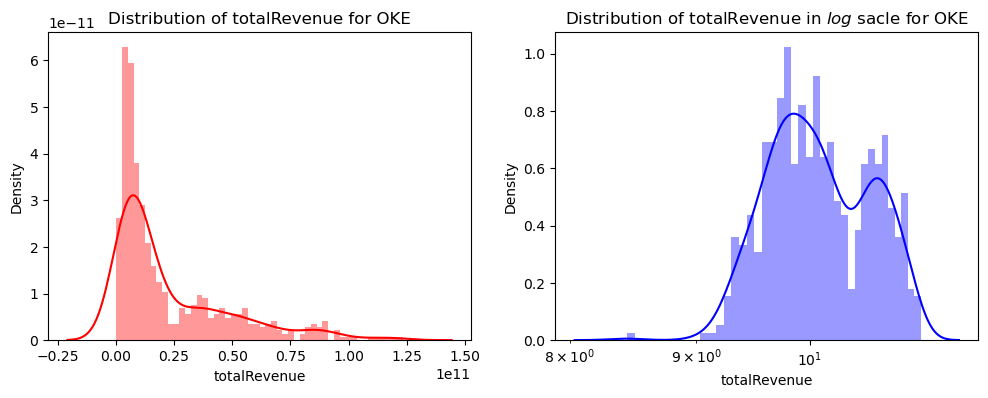

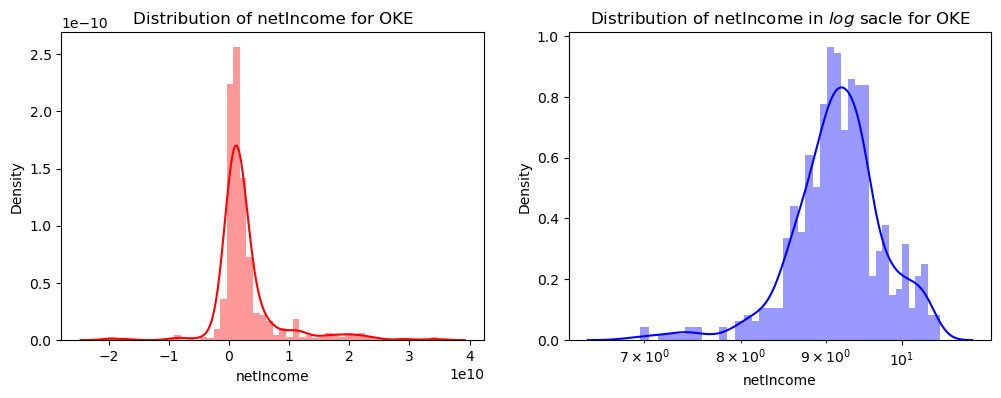

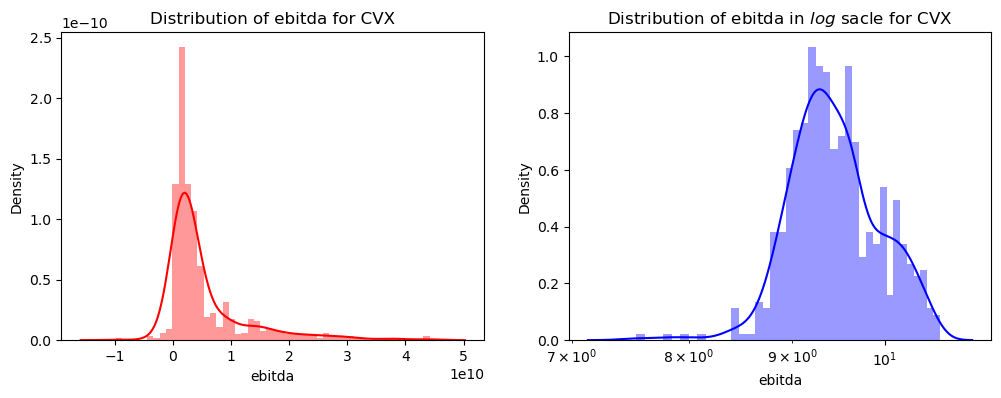

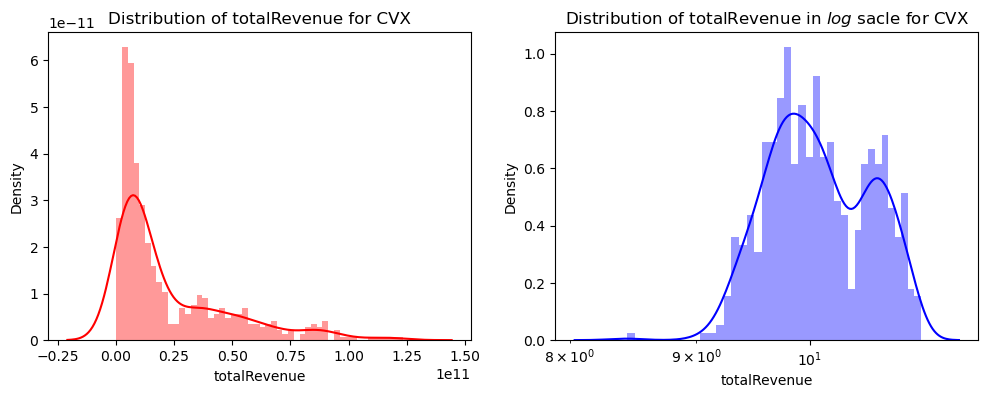

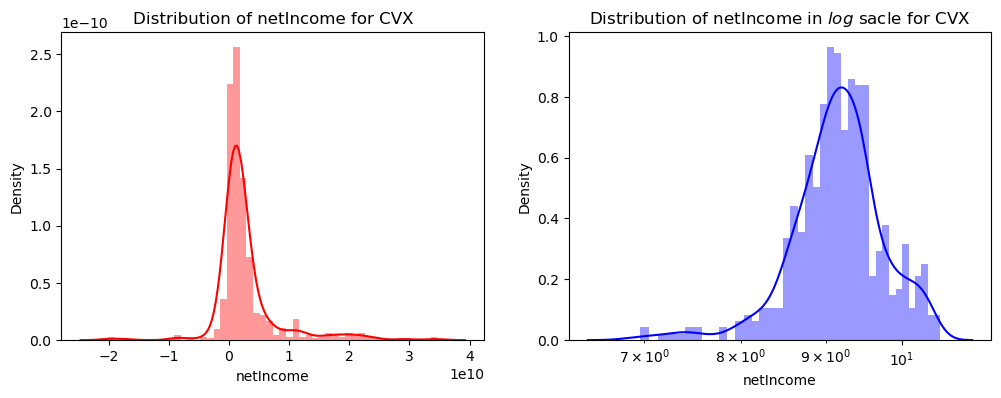

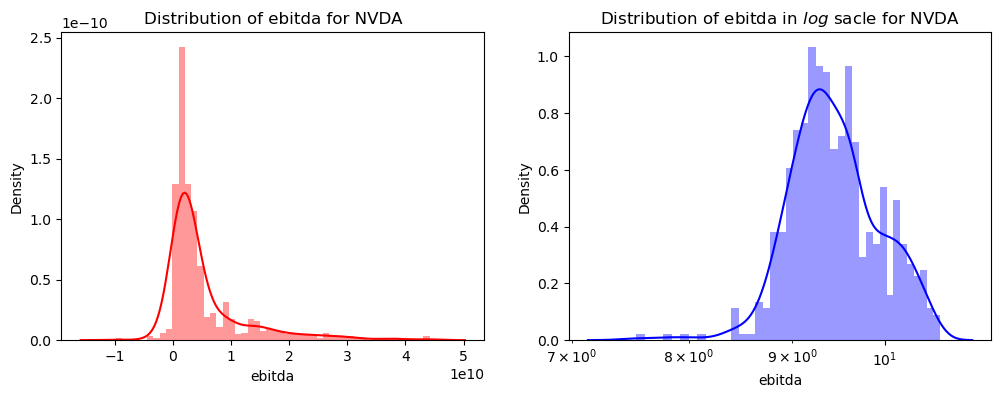

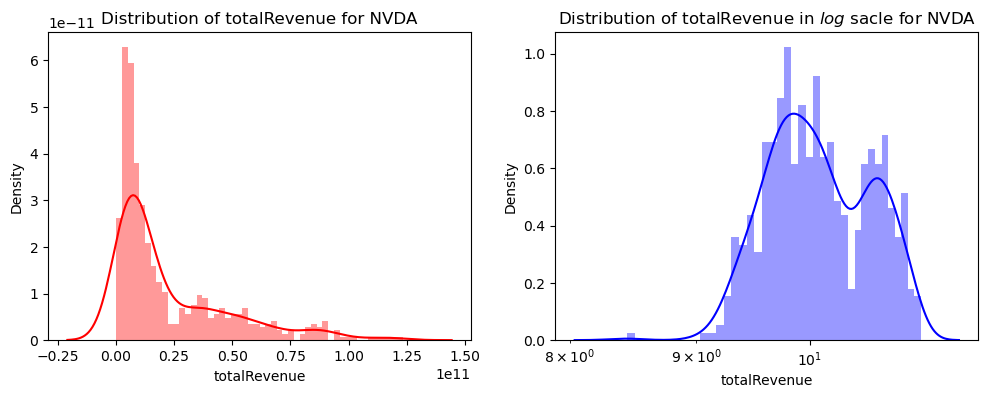

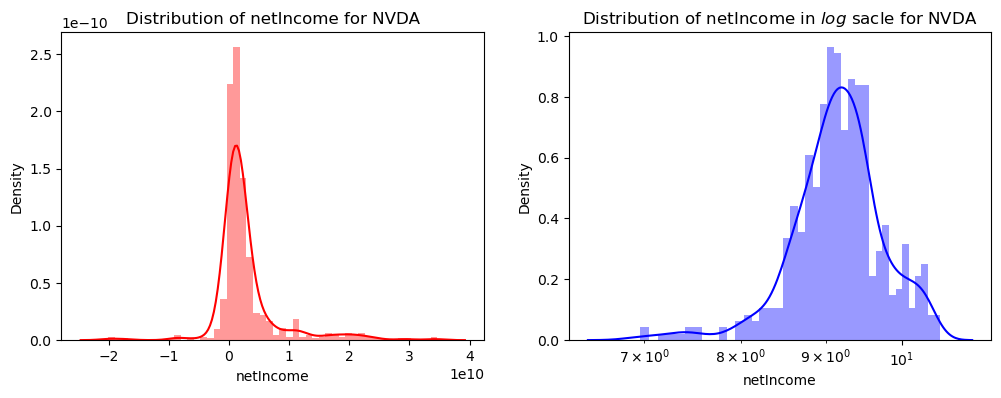

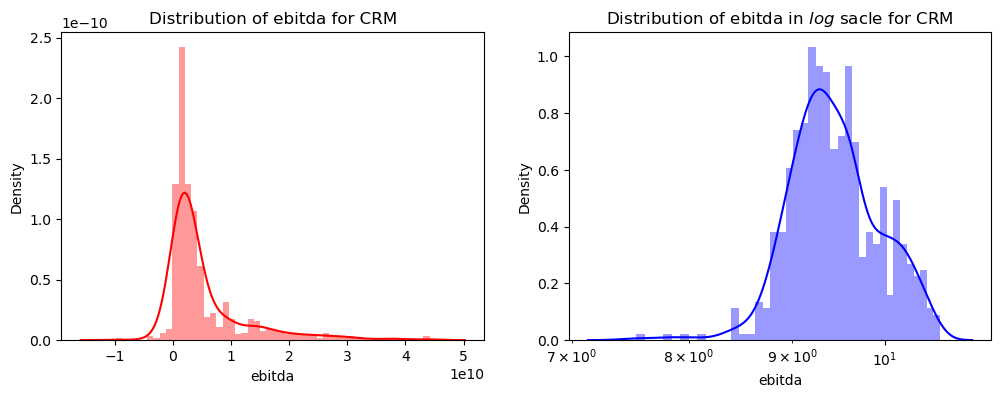

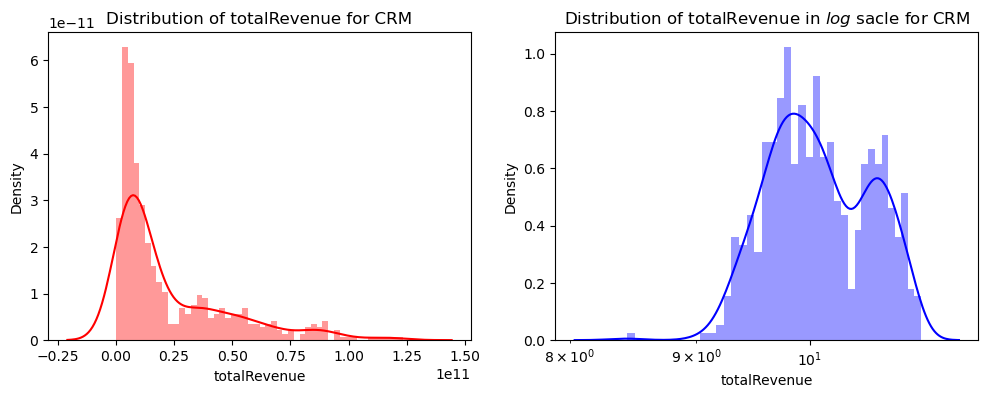

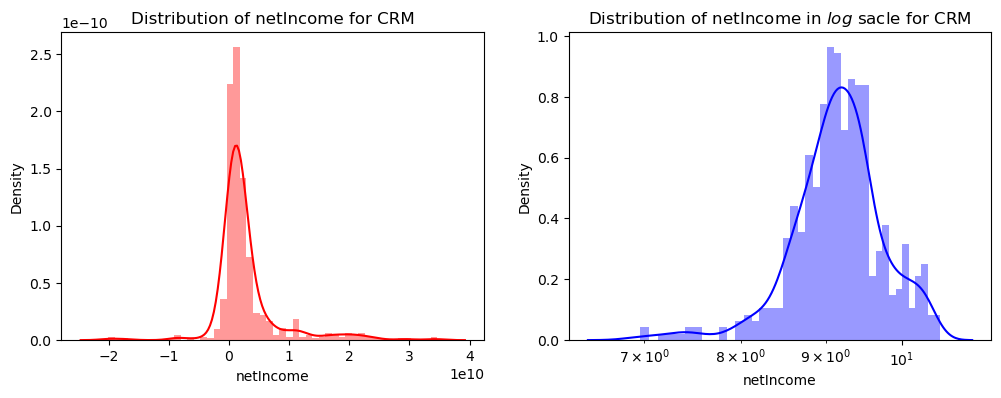

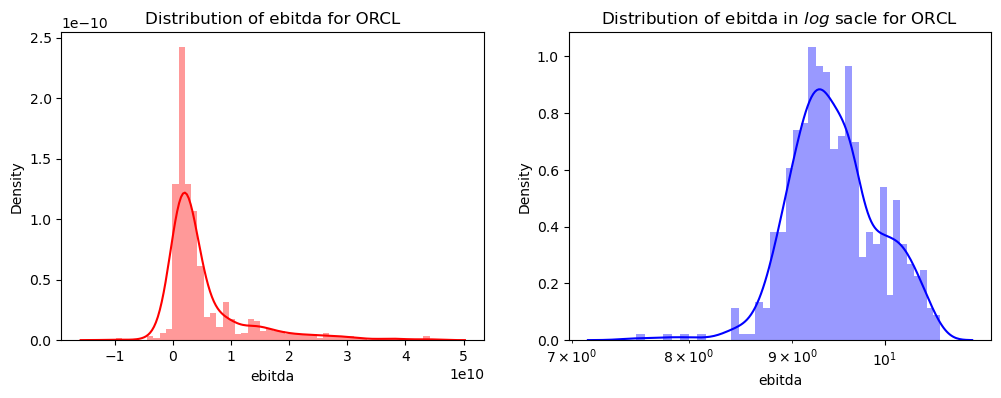

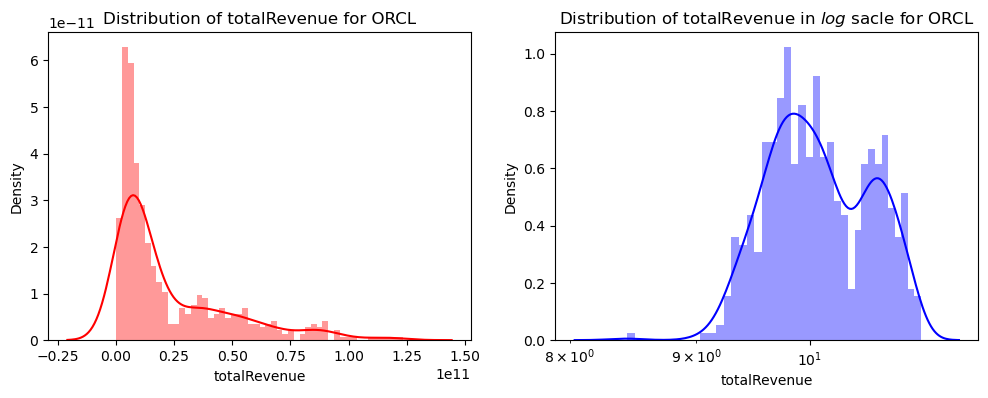

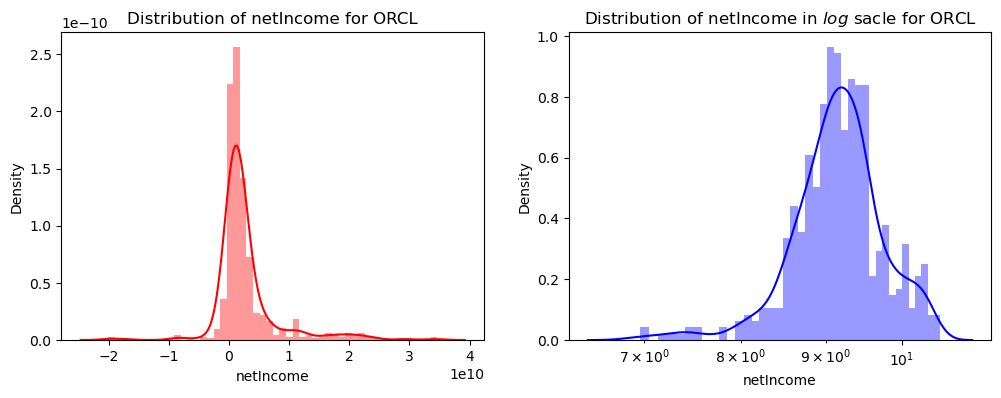

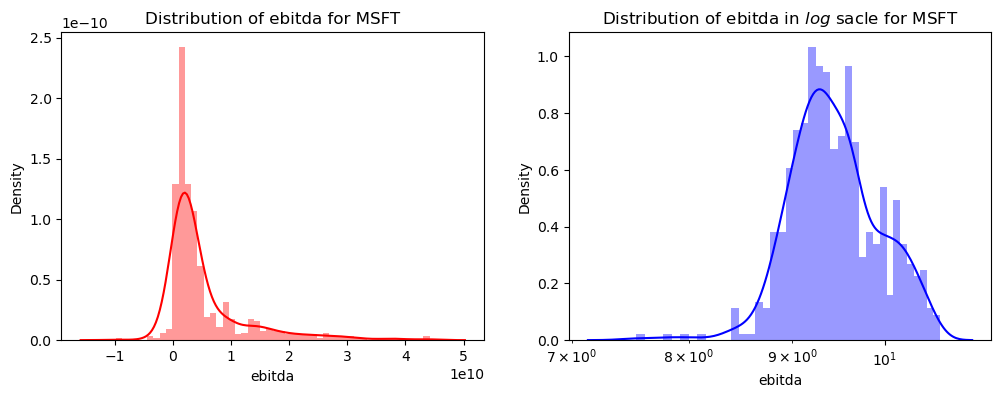

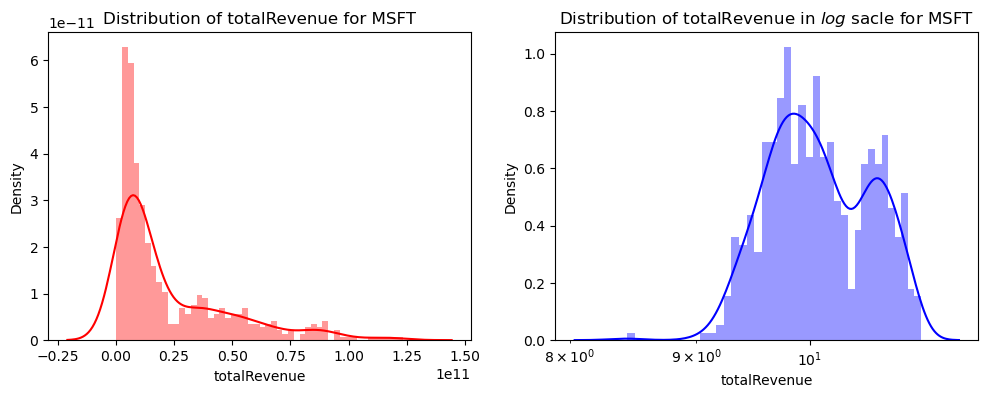

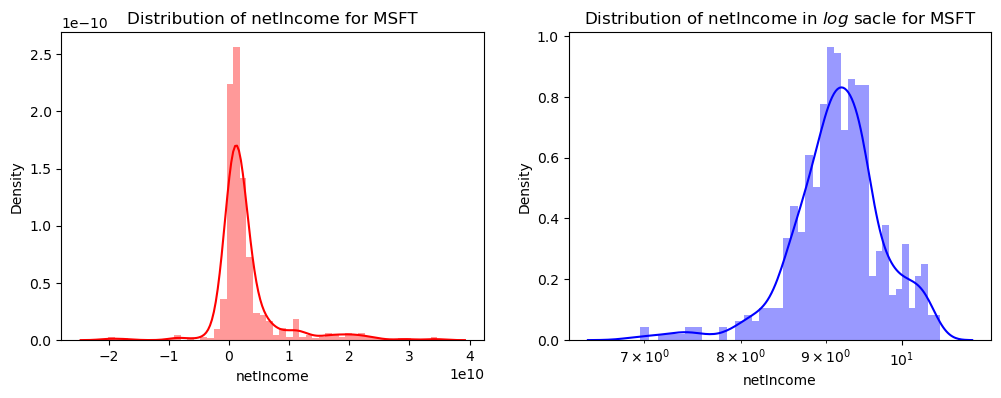

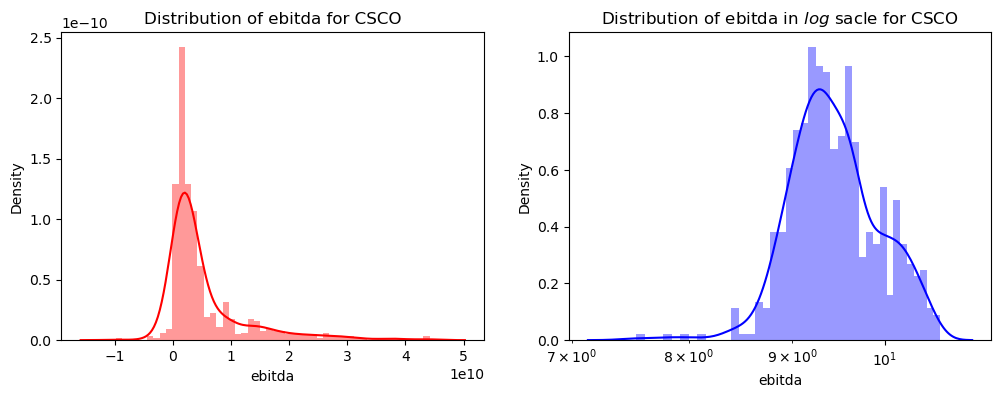

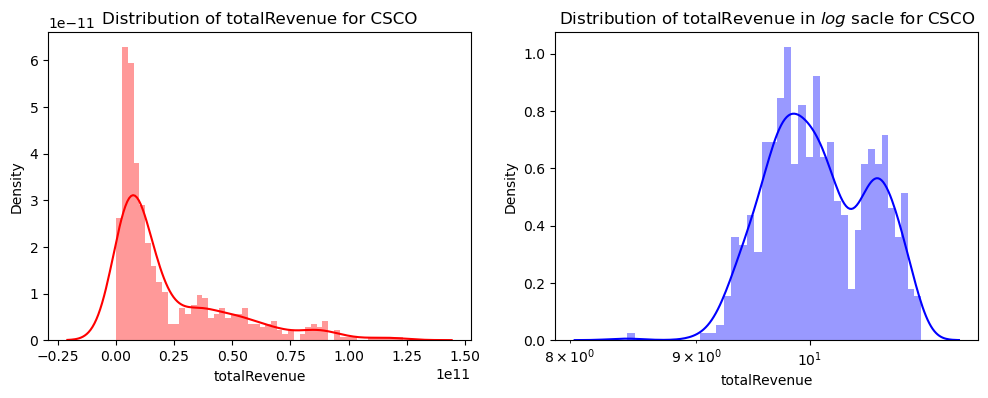

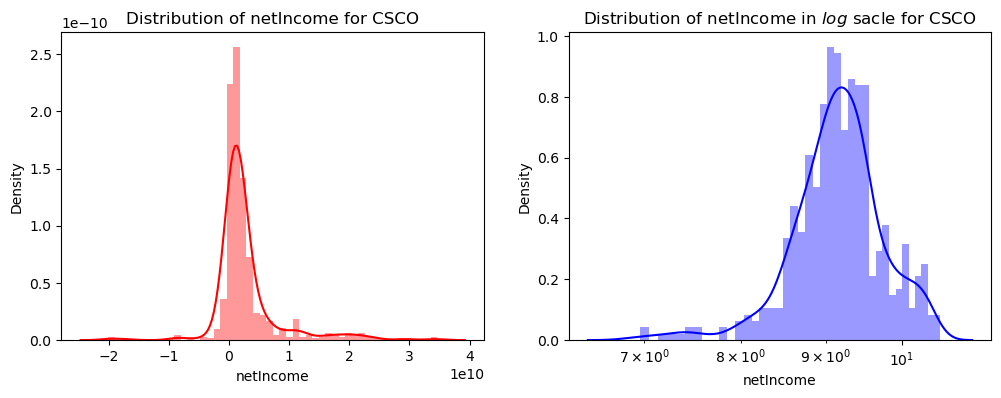

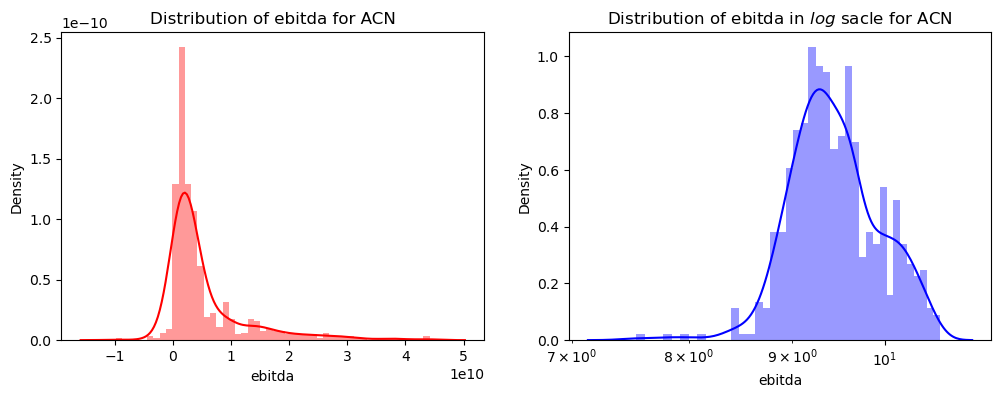

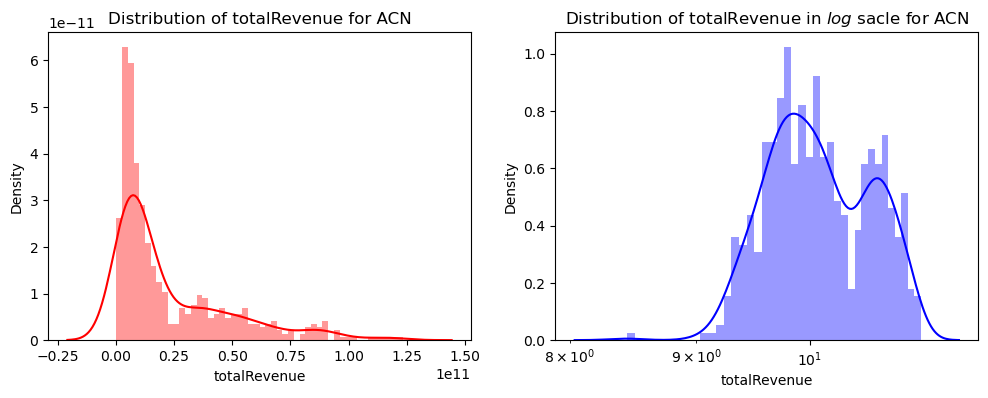

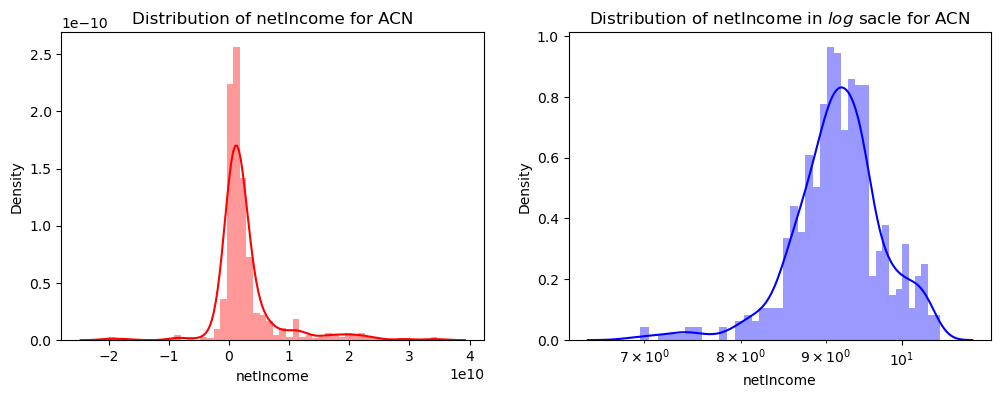

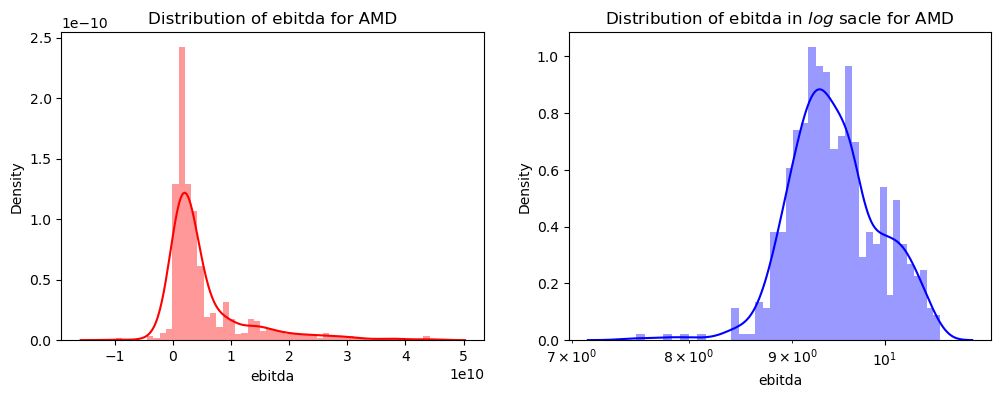

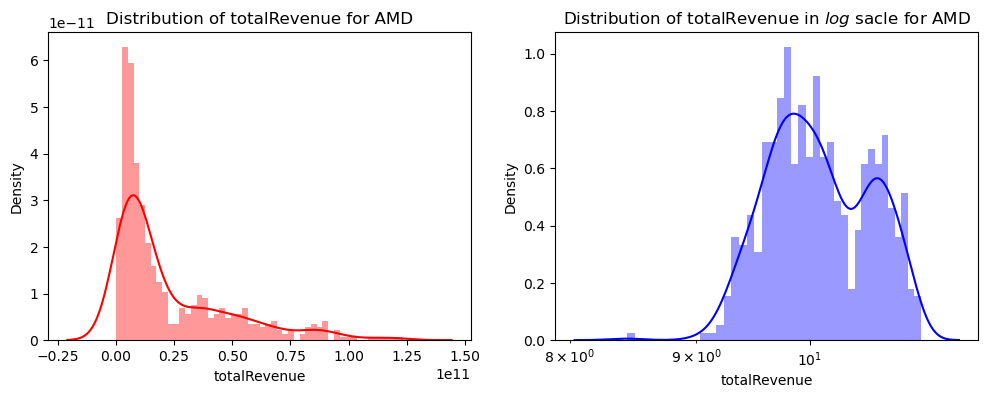

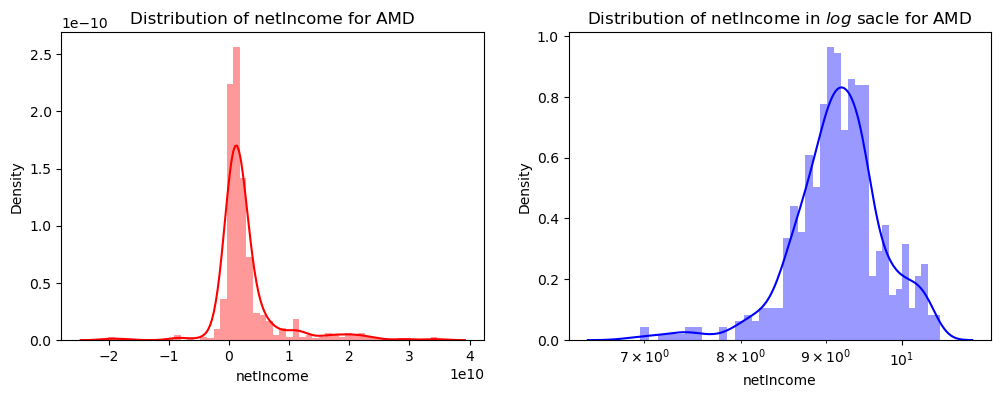

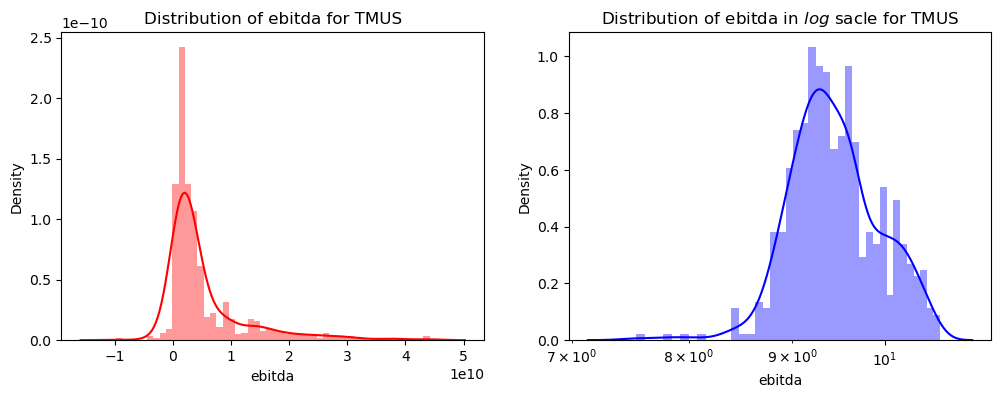

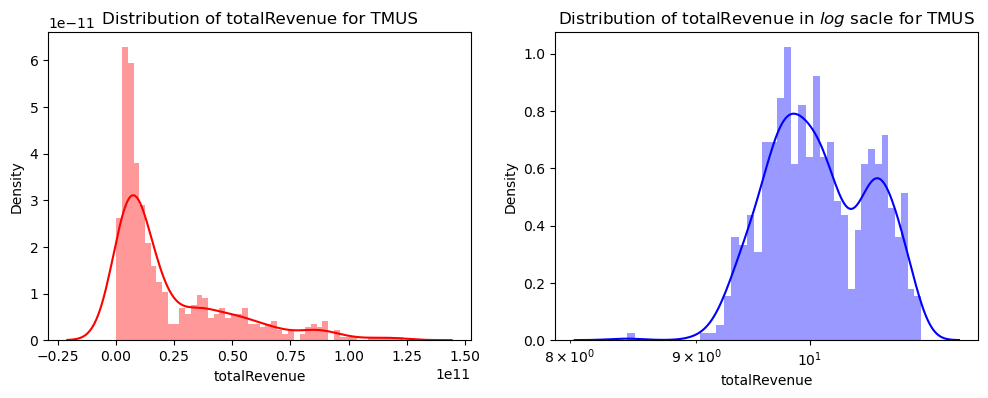

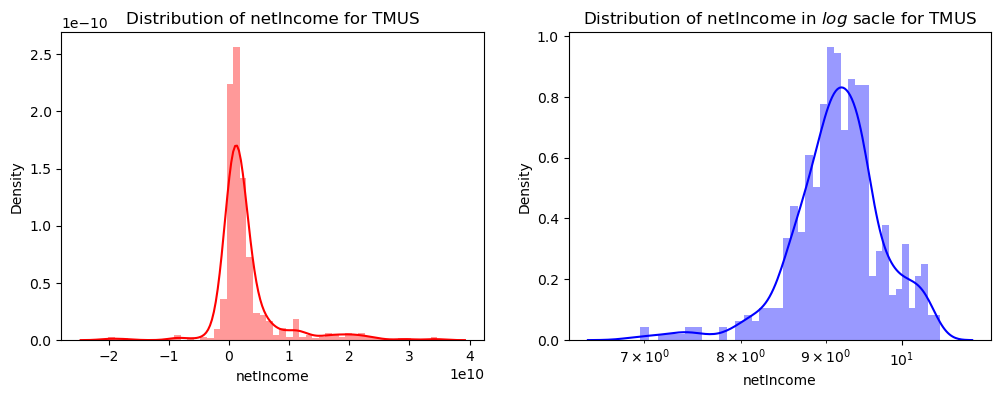

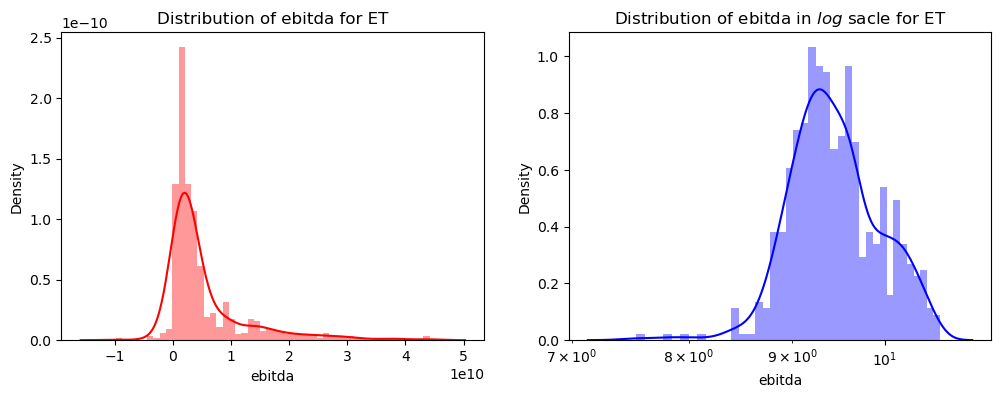

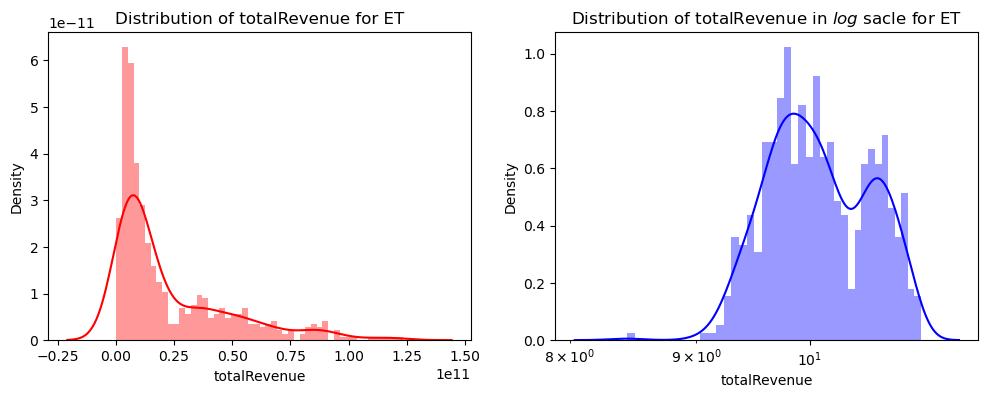

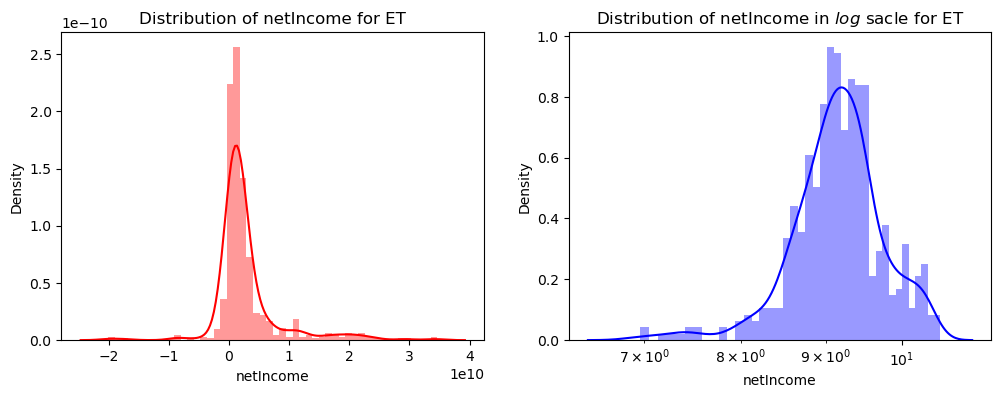

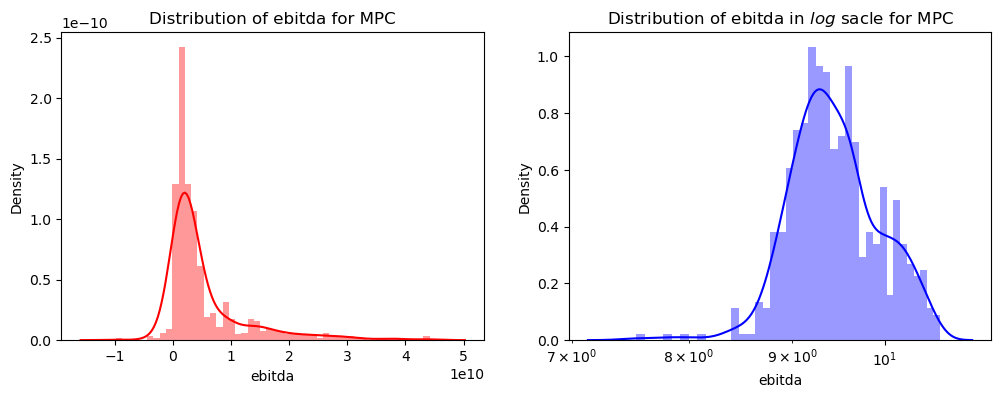

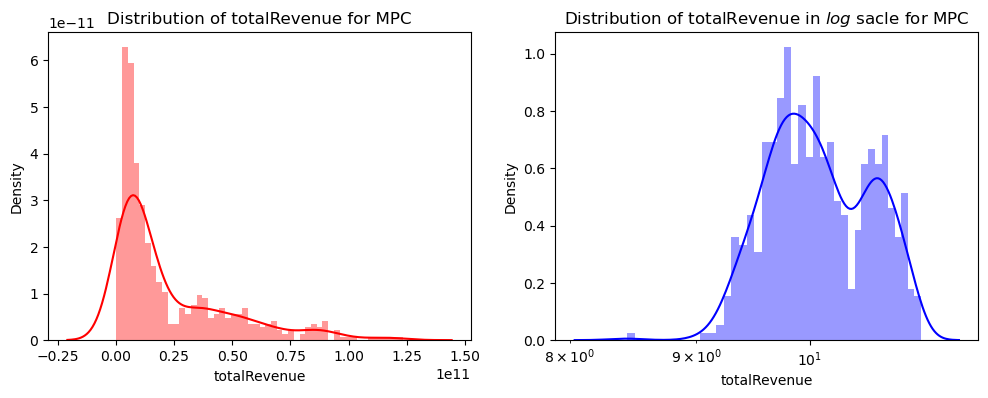

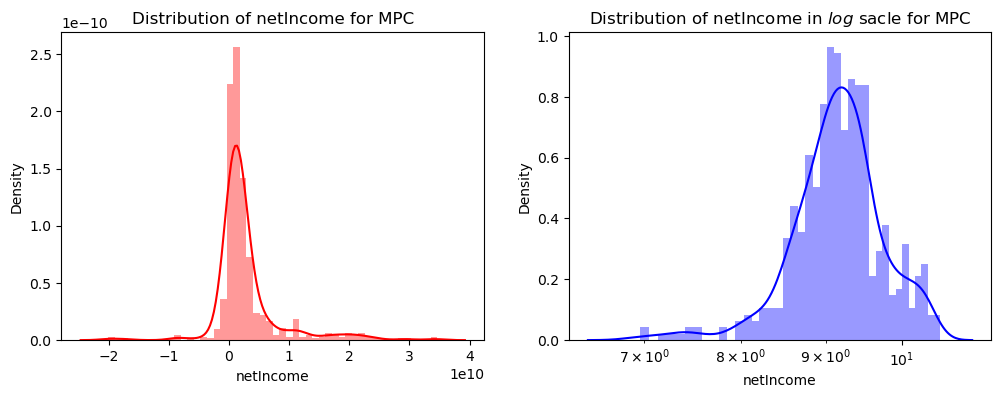

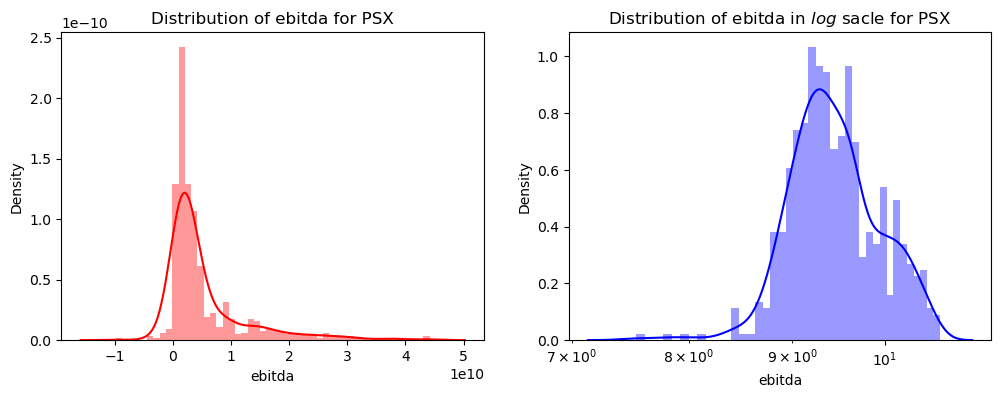

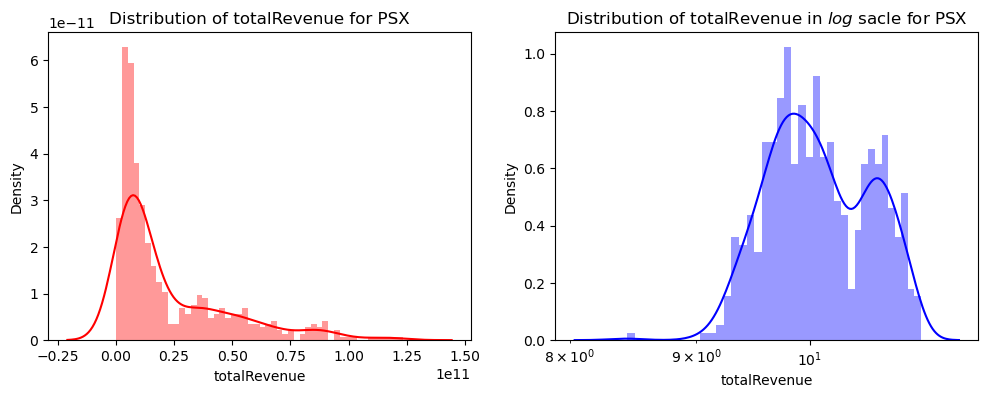

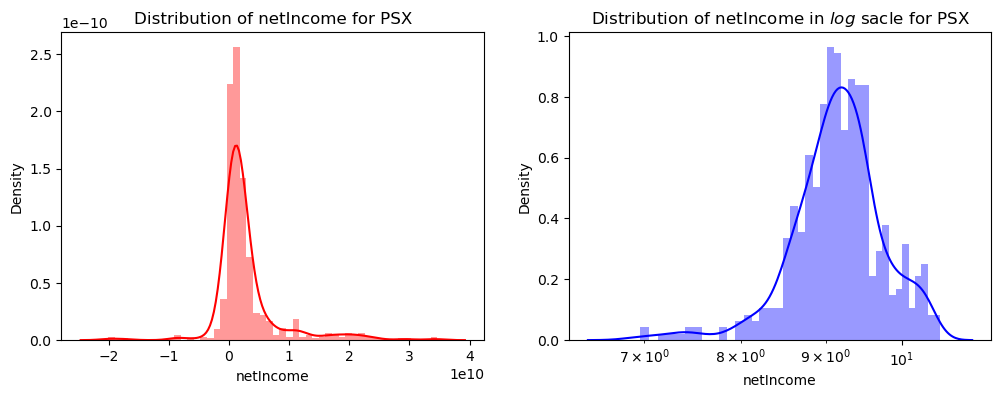

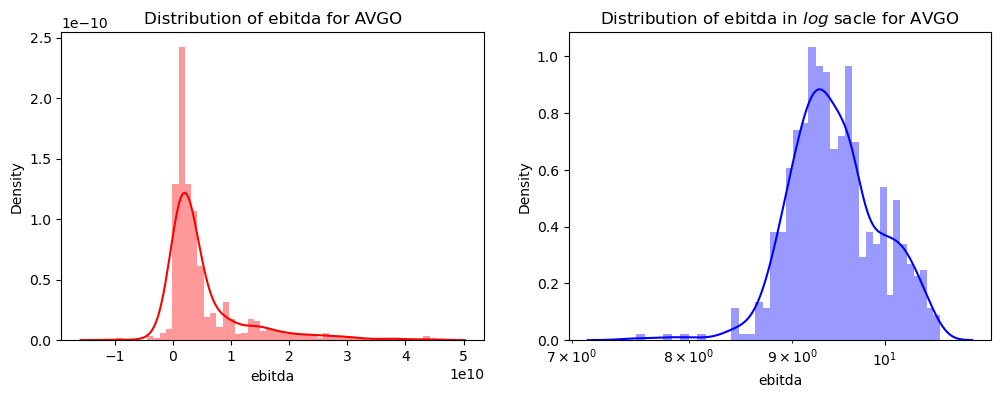

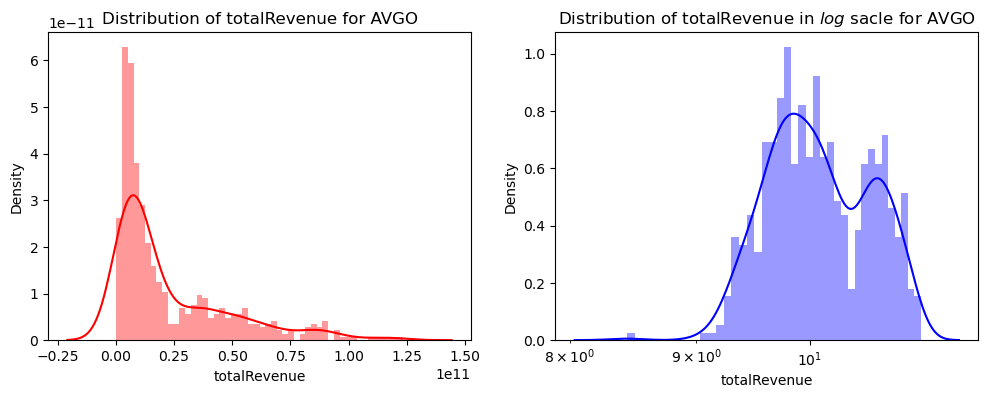

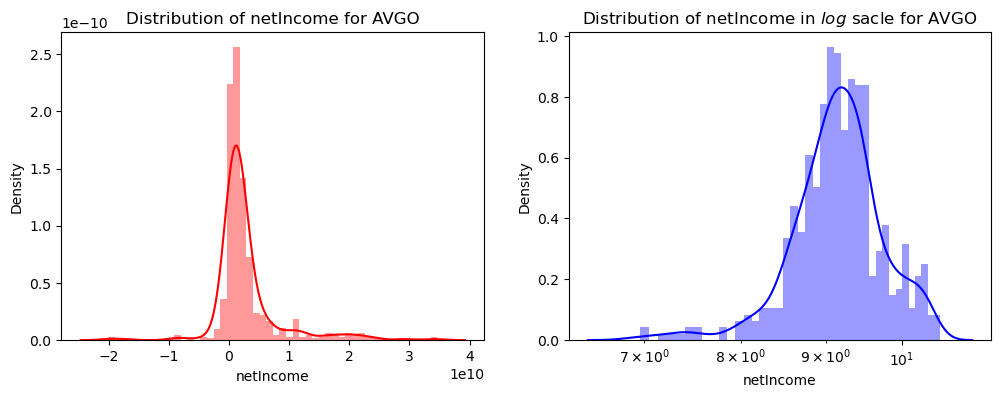

In [7]:
# analyze distribution
for ticker in selected_tickers:
    for financial in financial_indicators:
        f= plt.figure(figsize=(12,4))
        ax=f.add_subplot(121)
        sns.distplot(data[financial],bins=50,color='r',ax=ax)
        ax.set_title(f'Distribution of {financial} for {ticker}')

        ax=f.add_subplot(122)
        sns.distplot(np.log10(data[financial]),bins=40,color='b',ax=ax)
        ax.set_title(f'Distribution of {financial} in $log$ sacle for {ticker}')
        ax.set_xscale('log');

## 4. Model Building

In [36]:
# Function for each ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def linearModel(data, tickers) -> pd.DataFrame:
    results = []
    scaler = StandardScaler()
    for ticker in selected_tickers:
        XY_matrix = data[data['ticker'] == ticker]
        X = XY_matrix[financial_indicators]
        y = XY_matrix['avg_90d']
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.7, test_size = 0.3, random_state = 100)
        fit = LinearRegression().fit(X_train, y_train)
        r2 = fit.score(X_test, y_test)
        results.append({'Ticker': ticker, 'R2': r2})
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='R2', ascending=False)
    tickers_result = results_df[results_df['R2'] > 0.7] # tickers with R2 > 0.7
    return tickers_result
    

In [37]:
linearModel(data, selected_tickers)

Ticker        R2
20   MSFT  0.929902
2    ASML  0.836736
9     EOG  0.744260
22    ACN  0.743794